# **Part 2**

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/SC4002 Natural Language Processing



Mounted at /content/drive
/content/drive/MyDrive/SC4002 Natural Language Processing


In [3]:
from datasets import load_dataset

In [4]:
!git clone https://github.com/AkhiAcharya/SC4002-NLP-Project.git


fatal: destination path 'SC4002-NLP-Project' already exists and is not an empty directory.


In [5]:
import sys
sys.path.append('/content/SC4002-NLP-Project')

In [6]:
dataset = load_dataset("rotten_tomatoes")
train_dataset = dataset['train']
validation_dataset = dataset['validation']
test_dataset = dataset['test']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

train.parquet:   0%|          | 0.00/699k [00:00<?, ?B/s]

validation.parquet:   0%|          | 0.00/90.0k [00:00<?, ?B/s]

test.parquet:   0%|          | 0.00/92.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [7]:
print(test_dataset.to_pandas().head(15))

print(test_dataset[:15])  # View the first 5 rows as a dictionary


                                                 text  label
0   lovingly photographed in the manner of a golde...      1
1               consistently clever and suspenseful .      1
2   it's like a " big chill " reunion of the baade...      1
3   the story gives ample opportunity for large-sc...      1
4                   red dragon " never cuts corners .      1
5   fresnadillo has something serious to say about...      1
6   throws in enough clever and unexpected twists ...      1
7   weighty and ponderous but every bit as filling...      1
8   a real audience-pleaser that will strike a cho...      1
9   generates an enormous feeling of empathy for i...      1
10  exposing the ways we fool ourselves is one hou...      1
11  it's up to you to decide whether to admire the...      1
12  mostly , [goldbacher] just lets her complicate...      1
13  . . . quite good at providing some good old fa...      1
14  at its worst , the movie is pretty diverting ;...      1
{'text': ['lovingly phot

In [8]:
import os
import gensim.downloader as api
from gensim.models import KeyedVectors

def save_model_to_drive(model_name):
    import gensim.downloader as api
    from gensim.models import KeyedVectors
    import os

    save_path = '/content/drive/MyDrive/models'
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    if model_name == 'word2vec':
        path = api.load("word2vec-google-news-300", return_path=True)
        model = KeyedVectors.load_word2vec_format(path, binary=True)
        model.save(f'{save_path}/word2vec.model')
        print("Word2Vec model saved to Google Drive successfully!")

    elif model_name == 'glove':
        model = api.load("glove-wiki-gigaword-300")
        model.save(f'{save_path}/glove.model')
        print("GloVe model saved to Google Drive successfully!")

    return model

def load_model_from_drive(model_name):
    from gensim.models import KeyedVectors
    import os

    model_path = f'/content/drive/MyDrive/models/{model_name}.model'

    if os.path.exists(model_path):
        model = KeyedVectors.load(model_path)
        print(f"{model_name.capitalize()} model loaded from Drive successfully!")
        return model
    else:
        print(f"{model_name.capitalize()} model not found in Drive. Downloading and saving...")
        return save_model_to_drive(model_name)

def get_model(model_name):
    if model_name not in ['word2vec', 'glove']:
        raise ValueError("model_name must be either 'word2vec' or 'glove'")

    try:
        return load_model_from_drive(model_name)
    except Exception as e:
        print(f"Error loading {model_name} model: {str(e)}")
        return None

word2vec_model = get_model('word2vec')

glove_model = get_model('glove')

Word2vec model loaded from Drive successfully!
Glove model loaded from Drive successfully!


In [9]:
import os
import gensim.downloader as api
import pickle

def load_and_save_fasttext_model(drive_path="/content/drive/MyDrive/models/fasttext_model.model"):
    """
    Load the FastText model for OOV handling. Save the model to Google Drive if it does not exist.

    Args:
        drive_path (str): Path in Google Drive to save/load the FastText model.

    Returns:
        model: Loaded FastText model.
    """
    # Check if the model already exists in Google Drive
    if os.path.exists(drive_path):
        print("Loading FastText model from Drive...")
        fasttext_model = api.load(drive_path)
        print("FastText model loaded from Drive successfully.")
    else:
        print("Downloading FastText model...")
        # Load FastText model from gensim
        fasttext_model = api.load("fasttext-wiki-news-subwords-300")
        print("FastText model loaded successfully.")

    return fasttext_model


In [10]:
import numpy as np
# Load FastText model for OOV handling
fasttext_model = load_and_save_fasttext_model()
print("FastText model loaded successfully.")

[==================================================] 100.0% 958.5/958.4MB downloaded
FastText model loaded successfully.
FastText model loaded successfully.


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from collections import Counter
import re

In [13]:
from utils import SentimentDataset
from utils import get_device

device = get_device()

DEVICE:  cuda:0


In [14]:
print(type(train_dataset))
print(train_dataset[0])

<class 'datasets.arrow_dataset.Dataset'>
{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .', 'label': 1}


In [15]:
from utils import get_embedding

word_to_vector_map = {}


In [16]:
def prepare_data(dataset):
    texts = [example['text'] for example in dataset]
    labels = [example['label'] for example in dataset]
    return texts, labels

train_texts, train_labels = prepare_data(train_dataset)
val_texts, val_labels = prepare_data(validation_dataset)
test_texts, test_labels = prepare_data(test_dataset)

train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_labels = np.array(test_labels)

train_dataset = SentimentDataset(
    train_texts, train_labels, glove_model, word_to_vector_map, get_embedding
)

val_dataset = SentimentDataset(
    val_texts, val_labels, glove_model, word_to_vector_map, get_embedding
)

In [17]:
test_dataset = SentimentDataset(
    test_texts, test_labels, glove_model, word_to_vector_map, get_embedding
)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# 2a) Report the final configuration of your best model, namely the number of training epochs,learning rate, optimizer, batch size.

In [ ]:
import importlib
import RNN


In [ ]:
importlib.reload(RNN)



<module 'RNN' from '/content/drive/MyDrive/SC4002 Natural Language Processing/RNN.py'>

In [ ]:
from RNN import RNN, train_model_rnn, train_model_multiple_optimizers

Training with SGD optimizer
Run 1/5
Learning Rate:  0.001


Epoch 1/40:   0%|          | 0/267 [00:00<?, ?it/s]/content/drive/MyDrive/SC4002 Natural Language Processing/utils.py:79: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  return torch.FloatTensor(vectors), torch.LongTensor([self.labels[idx]])
Epoch 1/40: 100%|██████████| 267/267 [00:23<00:00, 11.24it/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:714: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:1410.)
  result = _VF.rnn_tanh(


Epoch 1/40:
Training Loss: 22.1451
Training Accuracy: 49.66%
Validation Accuracy: 50.28%
Learning Rate: 0.000905
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:21<00:00, 12.52it/s]


Epoch 2/40:
Training Loss: 22.1449
Training Accuracy: 49.40%
Validation Accuracy: 50.09%
Learning Rate: 0.000655


Epoch 3/40: 100%|██████████| 267/267 [00:20<00:00, 12.79it/s]


Epoch 3/40:
Training Loss: 22.1449
Training Accuracy: 48.68%
Validation Accuracy: 50.00%
Learning Rate: 0.000346


Epoch 4/40: 100%|██████████| 267/267 [00:21<00:00, 12.68it/s]


Epoch 4/40:
Training Loss: 22.1447
Training Accuracy: 49.62%
Validation Accuracy: 50.19%
Learning Rate: 0.000096


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.59it/s]


Epoch 5/40:
Training Loss: 22.1445
Training Accuracy: 49.91%
Validation Accuracy: 50.19%
Learning Rate: 0.001000


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.65it/s]


Epoch 6/40:
Training Loss: 22.1450
Training Accuracy: 49.46%
Validation Accuracy: 50.19%
Learning Rate: 0.000976


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.64it/s]


Epoch 7/40:
Training Loss: 22.1451
Training Accuracy: 49.82%
Validation Accuracy: 50.19%
Learning Rate: 0.000905


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.59it/s]


Epoch 8/40:
Training Loss: 22.1450
Training Accuracy: 49.37%
Validation Accuracy: 50.19%
Learning Rate: 0.000794
Early stopping triggered after epoch 8
Run 2/5
Learning Rate:  0.001


Epoch 1/40: 100%|██████████| 267/267 [00:21<00:00, 12.70it/s]


Epoch 1/40:
Training Loss: 22.1451
Training Accuracy: 49.99%
Validation Accuracy: 50.00%
Learning Rate: 0.000905
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:20<00:00, 12.75it/s]


Epoch 2/40:
Training Loss: 22.1448
Training Accuracy: 50.00%
Validation Accuracy: 50.00%
Learning Rate: 0.000655


Epoch 3/40: 100%|██████████| 267/267 [00:20<00:00, 12.82it/s]


Epoch 3/40:
Training Loss: 22.1445
Training Accuracy: 49.94%
Validation Accuracy: 50.00%
Learning Rate: 0.000346


Epoch 4/40: 100%|██████████| 267/267 [00:20<00:00, 12.75it/s]


Epoch 4/40:
Training Loss: 22.1443
Training Accuracy: 50.14%
Validation Accuracy: 50.00%
Learning Rate: 0.000096


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.68it/s]


Epoch 5/40:
Training Loss: 22.1441
Training Accuracy: 50.12%
Validation Accuracy: 50.09%
Learning Rate: 0.001000
New best validation accuracy! Saving model...


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.55it/s]


Epoch 6/40:
Training Loss: 22.1450
Training Accuracy: 50.07%
Validation Accuracy: 50.09%
Learning Rate: 0.000976


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.63it/s]


Epoch 7/40:
Training Loss: 22.1446
Training Accuracy: 49.59%
Validation Accuracy: 50.09%
Learning Rate: 0.000905


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.66it/s]


Epoch 8/40:
Training Loss: 22.1446
Training Accuracy: 49.17%
Validation Accuracy: 50.09%
Learning Rate: 0.000794


Epoch 9/40: 100%|██████████| 267/267 [00:21<00:00, 12.66it/s]


Epoch 9/40:
Training Loss: 22.1446
Training Accuracy: 49.61%
Validation Accuracy: 50.09%
Learning Rate: 0.000655


Epoch 10/40: 100%|██████████| 267/267 [00:21<00:00, 12.62it/s]


Epoch 10/40:
Training Loss: 22.1447
Training Accuracy: 49.23%
Validation Accuracy: 50.09%
Learning Rate: 0.000501


Epoch 11/40: 100%|██████████| 267/267 [00:21<00:00, 12.66it/s]


Epoch 11/40:
Training Loss: 22.1444
Training Accuracy: 49.43%
Validation Accuracy: 50.09%
Learning Rate: 0.000346


Epoch 12/40: 100%|██████████| 267/267 [00:21<00:00, 12.62it/s]


Epoch 12/40:
Training Loss: 22.1441
Training Accuracy: 49.59%
Validation Accuracy: 50.19%
Learning Rate: 0.000207
New best validation accuracy! Saving model...


Epoch 13/40: 100%|██████████| 267/267 [00:21<00:00, 12.69it/s]


Epoch 13/40:
Training Loss: 22.1442
Training Accuracy: 49.23%
Validation Accuracy: 50.19%
Learning Rate: 0.000096


Epoch 14/40: 100%|██████████| 267/267 [00:21<00:00, 12.65it/s]


Epoch 14/40:
Training Loss: 22.1442
Training Accuracy: 49.10%
Validation Accuracy: 50.19%
Learning Rate: 0.000025


Epoch 15/40: 100%|██████████| 267/267 [00:21<00:00, 12.71it/s]


Epoch 15/40:
Training Loss: 22.1440
Training Accuracy: 49.47%
Validation Accuracy: 50.09%
Learning Rate: 0.001000


Epoch 16/40: 100%|██████████| 267/267 [00:21<00:00, 12.64it/s]


Epoch 16/40:
Training Loss: 22.1446
Training Accuracy: 49.05%
Validation Accuracy: 50.00%
Learning Rate: 0.000994


Epoch 17/40: 100%|██████████| 267/267 [00:21<00:00, 12.64it/s]


Epoch 17/40:
Training Loss: 22.1443
Training Accuracy: 49.14%
Validation Accuracy: 50.09%
Learning Rate: 0.000976


Epoch 18/40: 100%|██████████| 267/267 [00:21<00:00, 12.69it/s]


Epoch 18/40:
Training Loss: 22.1447
Training Accuracy: 49.51%
Validation Accuracy: 50.00%
Learning Rate: 0.000946


Epoch 19/40: 100%|██████████| 267/267 [00:21<00:00, 12.61it/s]


Epoch 19/40:
Training Loss: 22.1444
Training Accuracy: 49.26%
Validation Accuracy: 50.00%
Learning Rate: 0.000905
Early stopping triggered after epoch 19
Run 3/5
Learning Rate:  0.001


Epoch 1/40: 100%|██████████| 267/267 [00:20<00:00, 12.77it/s]


Epoch 1/40:
Training Loss: 22.2312
Training Accuracy: 50.01%
Validation Accuracy: 50.00%
Learning Rate: 0.000905
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:20<00:00, 12.80it/s]


Epoch 2/40:
Training Loss: 22.1813
Training Accuracy: 50.01%
Validation Accuracy: 50.00%
Learning Rate: 0.000655


Epoch 3/40: 100%|██████████| 267/267 [00:21<00:00, 12.67it/s]


Epoch 3/40:
Training Loss: 22.1624
Training Accuracy: 50.01%
Validation Accuracy: 50.00%
Learning Rate: 0.000346


Epoch 4/40: 100%|██████████| 267/267 [00:20<00:00, 12.83it/s]


Epoch 4/40:
Training Loss: 22.1556
Training Accuracy: 50.01%
Validation Accuracy: 50.00%
Learning Rate: 0.000096


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.70it/s]


Epoch 5/40:
Training Loss: 22.1533
Training Accuracy: 50.02%
Validation Accuracy: 50.00%
Learning Rate: 0.001000


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.63it/s]


Epoch 6/40:
Training Loss: 22.1505
Training Accuracy: 50.01%
Validation Accuracy: 50.00%
Learning Rate: 0.000976


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.63it/s]


Epoch 7/40:
Training Loss: 22.1474
Training Accuracy: 50.02%
Validation Accuracy: 50.00%
Learning Rate: 0.000905


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.63it/s]


Epoch 8/40:
Training Loss: 22.1455
Training Accuracy: 50.02%
Validation Accuracy: 50.00%
Learning Rate: 0.000794
Early stopping triggered after epoch 8
Run 4/5
Learning Rate:  0.001


Epoch 1/40: 100%|██████████| 267/267 [00:20<00:00, 12.80it/s]


Epoch 1/40:
Training Loss: 22.1542
Training Accuracy: 50.00%
Validation Accuracy: 49.81%
Learning Rate: 0.000905
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:20<00:00, 12.76it/s]


Epoch 2/40:
Training Loss: 22.1489
Training Accuracy: 50.04%
Validation Accuracy: 49.81%
Learning Rate: 0.000655


Epoch 3/40: 100%|██████████| 267/267 [00:20<00:00, 12.77it/s]


Epoch 3/40:
Training Loss: 22.1466
Training Accuracy: 49.99%
Validation Accuracy: 49.81%
Learning Rate: 0.000346


Epoch 4/40: 100%|██████████| 267/267 [00:20<00:00, 12.74it/s]


Epoch 4/40:
Training Loss: 22.1457
Training Accuracy: 49.99%
Validation Accuracy: 50.00%
Learning Rate: 0.000096
New best validation accuracy! Saving model...


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.58it/s]


Epoch 5/40:
Training Loss: 22.1451
Training Accuracy: 50.00%
Validation Accuracy: 50.00%
Learning Rate: 0.001000


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.68it/s]


Epoch 6/40:
Training Loss: 22.1454
Training Accuracy: 49.99%
Validation Accuracy: 50.00%
Learning Rate: 0.000976


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.68it/s]


Epoch 7/40:
Training Loss: 22.1451
Training Accuracy: 49.98%
Validation Accuracy: 50.00%
Learning Rate: 0.000905


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.63it/s]


Epoch 8/40:
Training Loss: 22.1448
Training Accuracy: 50.14%
Validation Accuracy: 50.00%
Learning Rate: 0.000794


Epoch 9/40: 100%|██████████| 267/267 [00:21<00:00, 12.63it/s]


Epoch 9/40:
Training Loss: 22.1447
Training Accuracy: 49.93%
Validation Accuracy: 50.00%
Learning Rate: 0.000655


Epoch 10/40: 100%|██████████| 267/267 [00:21<00:00, 12.67it/s]


Epoch 10/40:
Training Loss: 22.1445
Training Accuracy: 50.11%
Validation Accuracy: 50.00%
Learning Rate: 0.000501


Epoch 11/40: 100%|██████████| 267/267 [00:21<00:00, 12.66it/s]


Epoch 11/40:
Training Loss: 22.1443
Training Accuracy: 50.01%
Validation Accuracy: 50.00%
Learning Rate: 0.000346
Early stopping triggered after epoch 11
Run 5/5
Learning Rate:  0.001


Epoch 1/40: 100%|██████████| 267/267 [00:20<00:00, 12.77it/s]


Epoch 1/40:
Training Loss: 22.1652
Training Accuracy: 50.00%
Validation Accuracy: 49.91%
Learning Rate: 0.000905
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:20<00:00, 12.72it/s]


Epoch 2/40:
Training Loss: 22.1521
Training Accuracy: 50.00%
Validation Accuracy: 49.91%
Learning Rate: 0.000655


Epoch 3/40: 100%|██████████| 267/267 [00:20<00:00, 12.73it/s]


Epoch 3/40:
Training Loss: 22.1479
Training Accuracy: 50.00%
Validation Accuracy: 49.91%
Learning Rate: 0.000346


Epoch 4/40: 100%|██████████| 267/267 [00:21<00:00, 12.69it/s]


Epoch 4/40:
Training Loss: 22.1464
Training Accuracy: 49.99%
Validation Accuracy: 49.91%
Learning Rate: 0.000096


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.63it/s]


Epoch 5/40:
Training Loss: 22.1456
Training Accuracy: 49.96%
Validation Accuracy: 49.91%
Learning Rate: 0.001000


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.64it/s]


Epoch 6/40:
Training Loss: 22.1460
Training Accuracy: 49.95%
Validation Accuracy: 49.91%
Learning Rate: 0.000976


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.56it/s]


Epoch 7/40:
Training Loss: 22.1457
Training Accuracy: 49.84%
Validation Accuracy: 49.91%
Learning Rate: 0.000905


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.67it/s]


Epoch 8/40:
Training Loss: 22.1455
Training Accuracy: 49.88%
Validation Accuracy: 49.91%
Learning Rate: 0.000794
Early stopping triggered after epoch 8
Training with RMSprop optimizer
Run 1/5
Learning Rate:  0.001


Epoch 1/40: 100%|██████████| 267/267 [00:21<00:00, 12.66it/s]


Epoch 1/40:
Training Loss: 22.1663
Training Accuracy: 49.84%
Validation Accuracy: 50.00%
Learning Rate: 0.000905
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:21<00:00, 12.68it/s]


Epoch 2/40:
Training Loss: 22.1462
Training Accuracy: 50.75%
Validation Accuracy: 50.00%
Learning Rate: 0.000655


Epoch 3/40: 100%|██████████| 267/267 [00:20<00:00, 12.74it/s]


Epoch 3/40:
Training Loss: 22.1477
Training Accuracy: 49.60%
Validation Accuracy: 50.00%
Learning Rate: 0.000346


Epoch 4/40: 100%|██████████| 267/267 [00:20<00:00, 12.73it/s]


Epoch 4/40:
Training Loss: 22.1455
Training Accuracy: 49.48%
Validation Accuracy: 50.00%
Learning Rate: 0.000096


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.61it/s]


Epoch 5/40:
Training Loss: 22.1447
Training Accuracy: 50.00%
Validation Accuracy: 50.00%
Learning Rate: 0.001000


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.60it/s]


Epoch 6/40:
Training Loss: 22.1467
Training Accuracy: 50.05%
Validation Accuracy: 50.00%
Learning Rate: 0.000976


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.55it/s]


Epoch 7/40:
Training Loss: 22.1510
Training Accuracy: 49.70%
Validation Accuracy: 50.00%
Learning Rate: 0.000905


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.58it/s]


Epoch 8/40:
Training Loss: 22.1471
Training Accuracy: 49.72%
Validation Accuracy: 50.00%
Learning Rate: 0.000794
Early stopping triggered after epoch 8
Run 2/5
Learning Rate:  0.001


Epoch 1/40: 100%|██████████| 267/267 [00:20<00:00, 12.75it/s]


Epoch 1/40:
Training Loss: 22.1706
Training Accuracy: 49.44%
Validation Accuracy: 50.00%
Learning Rate: 0.000905
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:20<00:00, 12.73it/s]


Epoch 2/40:
Training Loss: 22.1492
Training Accuracy: 49.44%
Validation Accuracy: 50.00%
Learning Rate: 0.000655


Epoch 3/40: 100%|██████████| 267/267 [00:20<00:00, 12.76it/s]


Epoch 3/40:
Training Loss: 22.1463
Training Accuracy: 49.93%
Validation Accuracy: 50.00%
Learning Rate: 0.000346


Epoch 4/40: 100%|██████████| 267/267 [00:20<00:00, 12.80it/s]


Epoch 4/40:
Training Loss: 22.1459
Training Accuracy: 49.93%
Validation Accuracy: 50.00%
Learning Rate: 0.000096


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.65it/s]


Epoch 5/40:
Training Loss: 22.1452
Training Accuracy: 50.00%
Validation Accuracy: 50.00%
Learning Rate: 0.001000


Epoch 6/40: 100%|██████████| 267/267 [00:20<00:00, 12.72it/s]


Epoch 6/40:
Training Loss: 22.1487
Training Accuracy: 49.11%
Validation Accuracy: 50.00%
Learning Rate: 0.000976


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.68it/s]


Epoch 7/40:
Training Loss: 22.1468
Training Accuracy: 50.33%
Validation Accuracy: 50.00%
Learning Rate: 0.000905


Epoch 8/40: 100%|██████████| 267/267 [00:20<00:00, 12.72it/s]


Epoch 8/40:
Training Loss: 22.1472
Training Accuracy: 49.48%
Validation Accuracy: 50.00%
Learning Rate: 0.000794
Early stopping triggered after epoch 8
Run 3/5
Learning Rate:  0.001


Epoch 1/40: 100%|██████████| 267/267 [00:20<00:00, 12.80it/s]


Epoch 1/40:
Training Loss: 22.1613
Training Accuracy: 50.38%
Validation Accuracy: 50.00%
Learning Rate: 0.000905
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:21<00:00, 12.69it/s]


Epoch 2/40:
Training Loss: 22.1510
Training Accuracy: 49.24%
Validation Accuracy: 50.00%
Learning Rate: 0.000655


Epoch 3/40: 100%|██████████| 267/267 [00:20<00:00, 12.78it/s]


Epoch 3/40:
Training Loss: 22.1497
Training Accuracy: 49.86%
Validation Accuracy: 50.00%
Learning Rate: 0.000346


Epoch 4/40: 100%|██████████| 267/267 [00:20<00:00, 12.73it/s]


Epoch 4/40:
Training Loss: 22.1469
Training Accuracy: 49.91%
Validation Accuracy: 50.00%
Learning Rate: 0.000096


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.62it/s]


Epoch 5/40:
Training Loss: 22.1457
Training Accuracy: 50.00%
Validation Accuracy: 50.00%
Learning Rate: 0.001000


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.63it/s]


Epoch 6/40:
Training Loss: 22.1507
Training Accuracy: 48.97%
Validation Accuracy: 50.00%
Learning Rate: 0.000976


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.61it/s]


Epoch 7/40:
Training Loss: 22.1484
Training Accuracy: 49.23%
Validation Accuracy: 50.00%
Learning Rate: 0.000905


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.66it/s]


Epoch 8/40:
Training Loss: 22.1562
Training Accuracy: 50.30%
Validation Accuracy: 50.00%
Learning Rate: 0.000794
Early stopping triggered after epoch 8
Run 4/5
Learning Rate:  0.001


Epoch 1/40: 100%|██████████| 267/267 [00:20<00:00, 12.78it/s]


Epoch 1/40:
Training Loss: 22.1770
Training Accuracy: 49.84%
Validation Accuracy: 50.00%
Learning Rate: 0.000905
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:20<00:00, 12.73it/s]


Epoch 2/40:
Training Loss: 22.1490
Training Accuracy: 49.55%
Validation Accuracy: 50.00%
Learning Rate: 0.000655


Epoch 3/40: 100%|██████████| 267/267 [00:20<00:00, 12.76it/s]


Epoch 3/40:
Training Loss: 22.1461
Training Accuracy: 49.46%
Validation Accuracy: 50.00%
Learning Rate: 0.000346


Epoch 4/40: 100%|██████████| 267/267 [00:21<00:00, 12.69it/s]


Epoch 4/40:
Training Loss: 22.1451
Training Accuracy: 50.21%
Validation Accuracy: 50.00%
Learning Rate: 0.000096


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.61it/s]


Epoch 5/40:
Training Loss: 22.1454
Training Accuracy: 50.00%
Validation Accuracy: 50.00%
Learning Rate: 0.001000


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.68it/s]


Epoch 6/40:
Training Loss: 22.1482
Training Accuracy: 48.64%
Validation Accuracy: 50.00%
Learning Rate: 0.000976


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.59it/s]


Epoch 7/40:
Training Loss: 22.1505
Training Accuracy: 49.23%
Validation Accuracy: 50.00%
Learning Rate: 0.000905


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.59it/s]


Epoch 8/40:
Training Loss: 22.1464
Training Accuracy: 50.16%
Validation Accuracy: 50.00%
Learning Rate: 0.000794
Early stopping triggered after epoch 8
Run 5/5
Learning Rate:  0.001


Epoch 1/40: 100%|██████████| 267/267 [00:21<00:00, 12.70it/s]


Epoch 1/40:
Training Loss: 22.1815
Training Accuracy: 49.58%
Validation Accuracy: 50.00%
Learning Rate: 0.000905
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:21<00:00, 12.65it/s]


Epoch 2/40:
Training Loss: 22.1495
Training Accuracy: 49.74%
Validation Accuracy: 50.00%
Learning Rate: 0.000655


Epoch 3/40: 100%|██████████| 267/267 [00:21<00:00, 12.66it/s]


Epoch 3/40:
Training Loss: 22.1461
Training Accuracy: 50.47%
Validation Accuracy: 50.00%
Learning Rate: 0.000346


Epoch 4/40: 100%|██████████| 267/267 [00:21<00:00, 12.60it/s]


Epoch 4/40:
Training Loss: 22.1476
Training Accuracy: 49.23%
Validation Accuracy: 50.00%
Learning Rate: 0.000096


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.56it/s]


Epoch 5/40:
Training Loss: 22.1446
Training Accuracy: 50.36%
Validation Accuracy: 50.00%
Learning Rate: 0.001000


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.60it/s]


Epoch 6/40:
Training Loss: 22.1488
Training Accuracy: 49.39%
Validation Accuracy: 50.00%
Learning Rate: 0.000976


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.60it/s]


Epoch 7/40:
Training Loss: 22.1492
Training Accuracy: 49.77%
Validation Accuracy: 50.00%
Learning Rate: 0.000905


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.64it/s]


Epoch 8/40:
Training Loss: 22.1490
Training Accuracy: 48.87%
Validation Accuracy: 50.00%
Learning Rate: 0.000794
Early stopping triggered after epoch 8
Training with Adam optimizer
Run 1/5
Learning Rate:  0.001


Epoch 1/40: 100%|██████████| 267/267 [00:21<00:00, 12.67it/s]


Epoch 1/40:
Training Loss: 22.2014
Training Accuracy: 50.54%
Validation Accuracy: 50.19%
Learning Rate: 0.000905
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:21<00:00, 12.71it/s]


Epoch 2/40:
Training Loss: 22.1514
Training Accuracy: 49.72%
Validation Accuracy: 49.44%
Learning Rate: 0.000655


Epoch 3/40: 100%|██████████| 267/267 [00:20<00:00, 12.73it/s]


Epoch 3/40:
Training Loss: 22.1289
Training Accuracy: 50.05%
Validation Accuracy: 49.62%
Learning Rate: 0.000346


Epoch 4/40: 100%|██████████| 267/267 [00:21<00:00, 12.67it/s]


Epoch 4/40:
Training Loss: 22.1259
Training Accuracy: 49.10%
Validation Accuracy: 49.44%
Learning Rate: 0.000096


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.63it/s]


Epoch 5/40:
Training Loss: 22.1137
Training Accuracy: 50.62%
Validation Accuracy: 49.44%
Learning Rate: 0.001000


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.57it/s]


Epoch 6/40:
Training Loss: 22.1384
Training Accuracy: 50.72%
Validation Accuracy: 49.53%
Learning Rate: 0.000976


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.63it/s]


Epoch 7/40:
Training Loss: 22.1351
Training Accuracy: 49.68%
Validation Accuracy: 49.25%
Learning Rate: 0.000905


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.62it/s]


Epoch 8/40:
Training Loss: 22.1276
Training Accuracy: 49.82%
Validation Accuracy: 49.34%
Learning Rate: 0.000794
Early stopping triggered after epoch 8
Run 2/5
Learning Rate:  0.001


Epoch 1/40: 100%|██████████| 267/267 [00:20<00:00, 12.71it/s]


Epoch 1/40:
Training Loss: 22.1687
Training Accuracy: 50.30%
Validation Accuracy: 50.09%
Learning Rate: 0.000905
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:21<00:00, 12.67it/s]


Epoch 2/40:
Training Loss: 22.2074
Training Accuracy: 50.01%
Validation Accuracy: 49.72%
Learning Rate: 0.000655


Epoch 3/40: 100%|██████████| 267/267 [00:20<00:00, 12.72it/s]


Epoch 3/40:
Training Loss: 22.1325
Training Accuracy: 50.12%
Validation Accuracy: 49.72%
Learning Rate: 0.000346


Epoch 4/40: 100%|██████████| 267/267 [00:20<00:00, 12.76it/s]


Epoch 4/40:
Training Loss: 22.1186
Training Accuracy: 50.23%
Validation Accuracy: 49.72%
Learning Rate: 0.000096


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.66it/s]


Epoch 5/40:
Training Loss: 22.1009
Training Accuracy: 50.64%
Validation Accuracy: 50.09%
Learning Rate: 0.001000


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.66it/s]


Epoch 6/40:
Training Loss: 22.1419
Training Accuracy: 49.99%
Validation Accuracy: 50.19%
Learning Rate: 0.000976
New best validation accuracy! Saving model...


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.64it/s]


Epoch 7/40:
Training Loss: 22.1208
Training Accuracy: 49.58%
Validation Accuracy: 50.09%
Learning Rate: 0.000905


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.67it/s]


Epoch 8/40:
Training Loss: 22.1527
Training Accuracy: 49.91%
Validation Accuracy: 49.72%
Learning Rate: 0.000794


Epoch 9/40: 100%|██████████| 267/267 [00:21<00:00, 12.55it/s]


Epoch 9/40:
Training Loss: 22.1328
Training Accuracy: 49.79%
Validation Accuracy: 49.44%
Learning Rate: 0.000655


Epoch 10/40: 100%|██████████| 267/267 [00:21<00:00, 12.55it/s]


Epoch 10/40:
Training Loss: 22.1112
Training Accuracy: 50.47%
Validation Accuracy: 49.91%
Learning Rate: 0.000501


Epoch 11/40: 100%|██████████| 267/267 [00:21<00:00, 12.55it/s]


Epoch 11/40:
Training Loss: 22.0951
Training Accuracy: 49.92%
Validation Accuracy: 49.91%
Learning Rate: 0.000346


Epoch 12/40: 100%|██████████| 267/267 [00:21<00:00, 12.58it/s]


Epoch 12/40:
Training Loss: 22.0688
Training Accuracy: 49.60%
Validation Accuracy: 49.91%
Learning Rate: 0.000207


Epoch 13/40: 100%|██████████| 267/267 [00:21<00:00, 12.58it/s]


Epoch 13/40:
Training Loss: 22.0237
Training Accuracy: 51.38%
Validation Accuracy: 50.56%
Learning Rate: 0.000096
New best validation accuracy! Saving model...


Epoch 14/40: 100%|██████████| 267/267 [00:21<00:00, 12.56it/s]


Epoch 14/40:
Training Loss: 21.9731
Training Accuracy: 51.06%
Validation Accuracy: 50.38%
Learning Rate: 0.000025


Epoch 15/40: 100%|██████████| 267/267 [00:21<00:00, 12.59it/s]


Epoch 15/40:
Training Loss: 21.9127
Training Accuracy: 52.22%
Validation Accuracy: 50.47%
Learning Rate: 0.001000


Epoch 16/40: 100%|██████████| 267/267 [00:21<00:00, 12.58it/s]


Epoch 16/40:
Training Loss: 22.0869
Training Accuracy: 50.33%
Validation Accuracy: 50.94%
Learning Rate: 0.000994
New best validation accuracy! Saving model...


Epoch 17/40: 100%|██████████| 267/267 [00:21<00:00, 12.61it/s]


Epoch 17/40:
Training Loss: 22.0789
Training Accuracy: 50.76%
Validation Accuracy: 50.75%
Learning Rate: 0.000976


Epoch 18/40: 100%|██████████| 267/267 [00:21<00:00, 12.54it/s]


Epoch 18/40:
Training Loss: 22.0845
Training Accuracy: 50.04%
Validation Accuracy: 50.75%
Learning Rate: 0.000946


Epoch 19/40: 100%|██████████| 267/267 [00:21<00:00, 12.56it/s]


Epoch 19/40:
Training Loss: 22.1038
Training Accuracy: 50.43%
Validation Accuracy: 50.75%
Learning Rate: 0.000905


Epoch 20/40: 100%|██████████| 267/267 [00:21<00:00, 12.58it/s]


Epoch 20/40:
Training Loss: 22.0301
Training Accuracy: 51.88%
Validation Accuracy: 50.84%
Learning Rate: 0.000854


Epoch 21/40: 100%|██████████| 267/267 [00:21<00:00, 12.62it/s]


Epoch 21/40:
Training Loss: 22.0861
Training Accuracy: 49.91%
Validation Accuracy: 50.75%
Learning Rate: 0.000794


Epoch 22/40: 100%|██████████| 267/267 [00:21<00:00, 12.58it/s]


Epoch 22/40:
Training Loss: 22.0908
Training Accuracy: 49.85%
Validation Accuracy: 50.66%
Learning Rate: 0.000727


Epoch 23/40: 100%|██████████| 267/267 [00:21<00:00, 12.61it/s]


Epoch 23/40:
Training Loss: 22.0392
Training Accuracy: 51.31%
Validation Accuracy: 50.94%
Learning Rate: 0.000655
Early stopping triggered after epoch 23
Run 3/5
Learning Rate:  0.001


Epoch 1/40: 100%|██████████| 267/267 [00:21<00:00, 12.65it/s]


Epoch 1/40:
Training Loss: 22.1853
Training Accuracy: 49.13%
Validation Accuracy: 50.28%
Learning Rate: 0.000905
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:21<00:00, 12.65it/s]


Epoch 2/40:
Training Loss: 22.3473
Training Accuracy: 50.68%
Validation Accuracy: 50.00%
Learning Rate: 0.000655


Epoch 3/40: 100%|██████████| 267/267 [00:21<00:00, 12.64it/s]


Epoch 3/40:
Training Loss: 22.3032
Training Accuracy: 50.90%
Validation Accuracy: 50.84%
Learning Rate: 0.000346
New best validation accuracy! Saving model...


Epoch 4/40: 100%|██████████| 267/267 [00:21<00:00, 12.70it/s]


Epoch 4/40:
Training Loss: 22.2196
Training Accuracy: 49.78%
Validation Accuracy: 50.19%
Learning Rate: 0.000096


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.63it/s]


Epoch 5/40:
Training Loss: 22.1745
Training Accuracy: 49.87%
Validation Accuracy: 49.72%
Learning Rate: 0.001000


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.59it/s]


Epoch 6/40:
Training Loss: 22.2880
Training Accuracy: 49.87%
Validation Accuracy: 49.44%
Learning Rate: 0.000976


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.54it/s]


Epoch 7/40:
Training Loss: 22.2955
Training Accuracy: 50.33%
Validation Accuracy: 51.41%
Learning Rate: 0.000905
New best validation accuracy! Saving model...


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.61it/s]


Epoch 8/40:
Training Loss: 22.3105
Training Accuracy: 49.33%
Validation Accuracy: 51.69%
Learning Rate: 0.000794
New best validation accuracy! Saving model...


Epoch 9/40: 100%|██████████| 267/267 [00:21<00:00, 12.48it/s]


Epoch 9/40:
Training Loss: 22.2267
Training Accuracy: 51.18%
Validation Accuracy: 50.56%
Learning Rate: 0.000655


Epoch 10/40: 100%|██████████| 267/267 [00:21<00:00, 12.58it/s]


Epoch 10/40:
Training Loss: 22.2339
Training Accuracy: 49.24%
Validation Accuracy: 49.72%
Learning Rate: 0.000501


Epoch 11/40: 100%|██████████| 267/267 [00:21<00:00, 12.65it/s]


Epoch 11/40:
Training Loss: 22.1818
Training Accuracy: 50.32%
Validation Accuracy: 48.50%
Learning Rate: 0.000346


Epoch 12/40: 100%|██████████| 267/267 [00:21<00:00, 12.59it/s]


Epoch 12/40:
Training Loss: 22.1537
Training Accuracy: 50.60%
Validation Accuracy: 49.91%
Learning Rate: 0.000207


Epoch 13/40: 100%|██████████| 267/267 [00:21<00:00, 12.62it/s]


Epoch 13/40:
Training Loss: 22.1502
Training Accuracy: 50.68%
Validation Accuracy: 49.62%
Learning Rate: 0.000096


Epoch 14/40: 100%|██████████| 267/267 [00:21<00:00, 12.59it/s]


Epoch 14/40:
Training Loss: 22.1273
Training Accuracy: 50.29%
Validation Accuracy: 52.35%
Learning Rate: 0.000025
New best validation accuracy! Saving model...


Epoch 15/40: 100%|██████████| 267/267 [00:21<00:00, 12.60it/s]


Epoch 15/40:
Training Loss: 22.1061
Training Accuracy: 51.30%
Validation Accuracy: 51.50%
Learning Rate: 0.001000


Epoch 16/40: 100%|██████████| 267/267 [00:21<00:00, 12.64it/s]


Epoch 16/40:
Training Loss: 22.2781
Training Accuracy: 50.27%
Validation Accuracy: 50.19%
Learning Rate: 0.000994


Epoch 17/40: 100%|██████████| 267/267 [00:21<00:00, 12.59it/s]


Epoch 17/40:
Training Loss: 22.2757
Training Accuracy: 50.21%
Validation Accuracy: 50.28%
Learning Rate: 0.000976


Epoch 18/40: 100%|██████████| 267/267 [00:21<00:00, 12.58it/s]


Epoch 18/40:
Training Loss: 22.2404
Training Accuracy: 50.04%
Validation Accuracy: 49.06%
Learning Rate: 0.000946


Epoch 19/40: 100%|██████████| 267/267 [00:21<00:00, 12.60it/s]


Epoch 19/40:
Training Loss: 22.2511
Training Accuracy: 50.57%
Validation Accuracy: 47.94%
Learning Rate: 0.000905


Epoch 20/40: 100%|██████████| 267/267 [00:21<00:00, 12.61it/s]


Epoch 20/40:
Training Loss: 22.2542
Training Accuracy: 50.53%
Validation Accuracy: 47.56%
Learning Rate: 0.000854


Epoch 21/40: 100%|██████████| 267/267 [00:21<00:00, 12.65it/s]


Epoch 21/40:
Training Loss: 22.2450
Training Accuracy: 50.67%
Validation Accuracy: 47.00%
Learning Rate: 0.000794
Early stopping triggered after epoch 21
Run 4/5
Learning Rate:  0.001


Epoch 1/40: 100%|██████████| 267/267 [00:21<00:00, 12.69it/s]


Epoch 1/40:
Training Loss: 22.1710
Training Accuracy: 49.68%
Validation Accuracy: 50.38%
Learning Rate: 0.000905
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:20<00:00, 12.73it/s]


Epoch 2/40:
Training Loss: 22.2065
Training Accuracy: 50.43%
Validation Accuracy: 49.62%
Learning Rate: 0.000655


Epoch 3/40: 100%|██████████| 267/267 [00:20<00:00, 12.73it/s]


Epoch 3/40:
Training Loss: 22.1530
Training Accuracy: 49.14%
Validation Accuracy: 51.03%
Learning Rate: 0.000346
New best validation accuracy! Saving model...


Epoch 4/40: 100%|██████████| 267/267 [00:21<00:00, 12.71it/s]


Epoch 4/40:
Training Loss: 22.1262
Training Accuracy: 49.55%
Validation Accuracy: 51.03%
Learning Rate: 0.000096


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.66it/s]


Epoch 5/40:
Training Loss: 22.1064
Training Accuracy: 50.11%
Validation Accuracy: 51.13%
Learning Rate: 0.001000
New best validation accuracy! Saving model...


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.60it/s]


Epoch 6/40:
Training Loss: 22.1389
Training Accuracy: 50.14%
Validation Accuracy: 50.94%
Learning Rate: 0.000976


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.67it/s]


Epoch 7/40:
Training Loss: 22.1203
Training Accuracy: 51.23%
Validation Accuracy: 51.13%
Learning Rate: 0.000905


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.64it/s]


Epoch 8/40:
Training Loss: 22.1185
Training Accuracy: 49.87%
Validation Accuracy: 50.84%
Learning Rate: 0.000794


Epoch 9/40: 100%|██████████| 267/267 [00:21<00:00, 12.59it/s]


Epoch 9/40:
Training Loss: 22.6282
Training Accuracy: 50.20%
Validation Accuracy: 50.47%
Learning Rate: 0.000655


Epoch 10/40: 100%|██████████| 267/267 [00:21<00:00, 12.61it/s]


Epoch 10/40:
Training Loss: 22.2676
Training Accuracy: 50.34%
Validation Accuracy: 50.19%
Learning Rate: 0.000501


Epoch 11/40: 100%|██████████| 267/267 [00:21<00:00, 12.62it/s]


Epoch 11/40:
Training Loss: 22.2308
Training Accuracy: 49.62%
Validation Accuracy: 50.75%
Learning Rate: 0.000346


Epoch 12/40: 100%|██████████| 267/267 [00:21<00:00, 12.60it/s]


Epoch 12/40:
Training Loss: 22.2008
Training Accuracy: 50.61%
Validation Accuracy: 50.00%
Learning Rate: 0.000207
Early stopping triggered after epoch 12
Run 5/5
Learning Rate:  0.001


Epoch 1/40: 100%|██████████| 267/267 [00:21<00:00, 12.67it/s]


Epoch 1/40:
Training Loss: 22.1625
Training Accuracy: 50.11%
Validation Accuracy: 50.28%
Learning Rate: 0.000905
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:20<00:00, 12.72it/s]


Epoch 2/40:
Training Loss: 22.1501
Training Accuracy: 50.28%
Validation Accuracy: 50.66%
Learning Rate: 0.000655
New best validation accuracy! Saving model...


Epoch 3/40: 100%|██████████| 267/267 [00:21<00:00, 12.69it/s]


Epoch 3/40:
Training Loss: 22.1445
Training Accuracy: 49.98%
Validation Accuracy: 50.56%
Learning Rate: 0.000346


Epoch 4/40: 100%|██████████| 267/267 [00:21<00:00, 12.70it/s]


Epoch 4/40:
Training Loss: 22.1346
Training Accuracy: 49.33%
Validation Accuracy: 49.53%
Learning Rate: 0.000096


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.61it/s]


Epoch 5/40:
Training Loss: 22.1102
Training Accuracy: 50.16%
Validation Accuracy: 49.72%
Learning Rate: 0.001000


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.62it/s]


Epoch 6/40:
Training Loss: 22.1415
Training Accuracy: 50.09%
Validation Accuracy: 49.72%
Learning Rate: 0.000976


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.64it/s]


Epoch 7/40:
Training Loss: 22.1382
Training Accuracy: 49.62%
Validation Accuracy: 49.62%
Learning Rate: 0.000905


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.65it/s]


Epoch 8/40:
Training Loss: 22.1599
Training Accuracy: 50.21%
Validation Accuracy: 49.44%
Learning Rate: 0.000794


Epoch 9/40: 100%|██████████| 267/267 [00:21<00:00, 12.66it/s]


Epoch 9/40:
Training Loss: 22.2073
Training Accuracy: 49.48%
Validation Accuracy: 50.00%
Learning Rate: 0.000655
Early stopping triggered after epoch 9


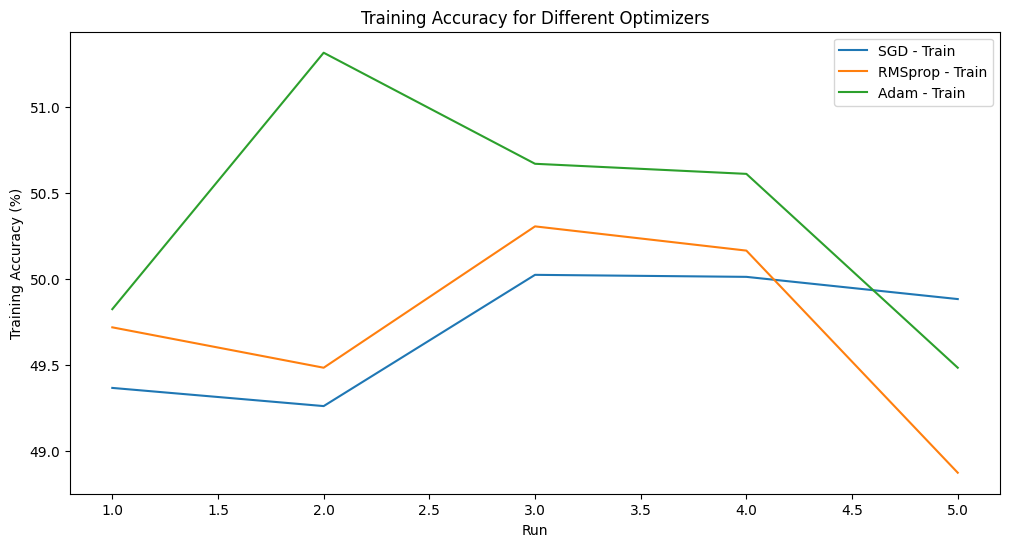

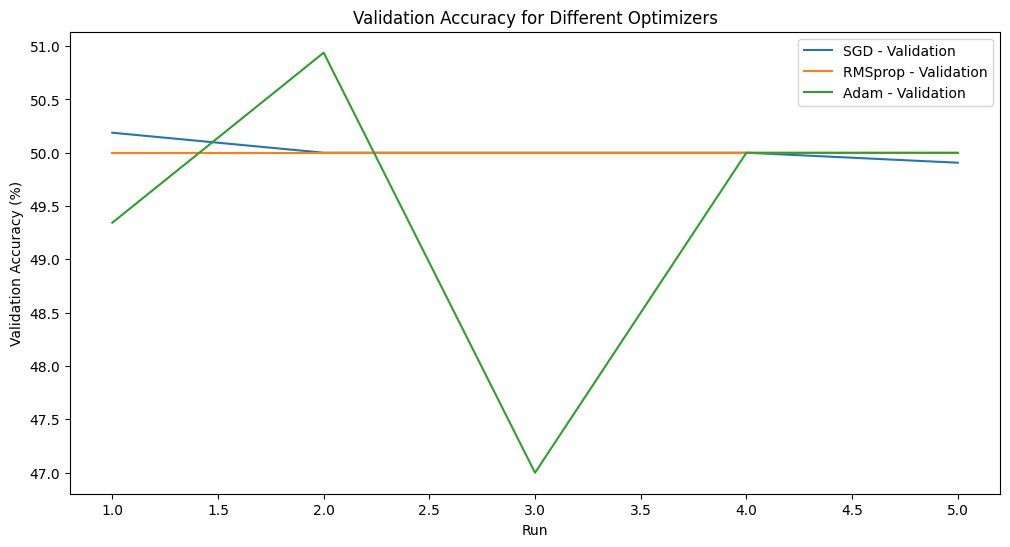

In [ ]:
train_model_multiple_optimizers(RNN,
                               train_loader,
                               val_loader,
                               num_epochs=40,
                               device=device,
                               model_name='rnn_model',
                               num_runs=5)

In [ ]:
import RNN
importlib.reload(RNN)

<module 'RNN' from '/content/drive/MyDrive/SC4002 Natural Language Processing/RNN.py'>

In [ ]:
from RNN import RNN, train_model_rnn, train_model_multiple_learning_rates

Training with learning rate 0.001
Run 1/3
Learning Rate:  0.001


Epoch 1/40: 100%|██████████| 267/267 [00:21<00:00, 12.65it/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:714: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:1410.)
  result = _VF.rnn_tanh(


Epoch 1/40:
Training Loss: 22.1833
Training Accuracy: 49.11%
Validation Accuracy: 49.91%
Learning Rate: 0.000905
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:20<00:00, 12.71it/s]


Epoch 2/40:
Training Loss: 22.1462
Training Accuracy: 49.44%
Validation Accuracy: 49.81%
Learning Rate: 0.000655


Epoch 3/40: 100%|██████████| 267/267 [00:21<00:00, 12.70it/s]


Epoch 3/40:
Training Loss: 22.1285
Training Accuracy: 50.29%
Validation Accuracy: 49.62%
Learning Rate: 0.000346


Epoch 4/40: 100%|██████████| 267/267 [00:20<00:00, 12.76it/s]


Epoch 4/40:
Training Loss: 22.1236
Training Accuracy: 49.32%
Validation Accuracy: 49.72%
Learning Rate: 0.000096


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.65it/s]


Epoch 5/40:
Training Loss: 22.0908
Training Accuracy: 49.34%
Validation Accuracy: 51.88%
Learning Rate: 0.001000
New best validation accuracy! Saving model...


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.62it/s]


Epoch 6/40:
Training Loss: 22.1564
Training Accuracy: 50.48%
Validation Accuracy: 49.62%
Learning Rate: 0.000976


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.68it/s]


Epoch 7/40:
Training Loss: 22.1424
Training Accuracy: 51.06%
Validation Accuracy: 49.62%
Learning Rate: 0.000905


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.61it/s]


Epoch 8/40:
Training Loss: 22.1327
Training Accuracy: 50.84%
Validation Accuracy: 49.72%
Learning Rate: 0.000794


Epoch 9/40: 100%|██████████| 267/267 [00:21<00:00, 12.60it/s]


Epoch 9/40:
Training Loss: 22.1381
Training Accuracy: 49.88%
Validation Accuracy: 49.34%
Learning Rate: 0.000655


Epoch 10/40: 100%|██████████| 267/267 [00:21<00:00, 12.66it/s]


Epoch 10/40:
Training Loss: 22.1262
Training Accuracy: 49.96%
Validation Accuracy: 49.53%
Learning Rate: 0.000501


Epoch 11/40: 100%|██████████| 267/267 [00:21<00:00, 12.60it/s]


Epoch 11/40:
Training Loss: 22.1082
Training Accuracy: 50.13%
Validation Accuracy: 49.44%
Learning Rate: 0.000346


Epoch 12/40: 100%|██████████| 267/267 [00:21<00:00, 12.56it/s]


Epoch 12/40:
Training Loss: 22.0785
Training Accuracy: 50.90%
Validation Accuracy: 49.53%
Learning Rate: 0.000207
Early stopping triggered after epoch 12
Run 2/3
Learning Rate:  0.001


Epoch 1/40: 100%|██████████| 267/267 [00:21<00:00, 12.67it/s]


Epoch 1/40:
Training Loss: 22.1711
Training Accuracy: 49.64%
Validation Accuracy: 50.19%
Learning Rate: 0.000905
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:21<00:00, 12.71it/s]


Epoch 2/40:
Training Loss: 22.1348
Training Accuracy: 50.80%
Validation Accuracy: 50.19%
Learning Rate: 0.000655


Epoch 3/40: 100%|██████████| 267/267 [00:20<00:00, 12.72it/s]


Epoch 3/40:
Training Loss: 22.1256
Training Accuracy: 50.73%
Validation Accuracy: 50.47%
Learning Rate: 0.000346
New best validation accuracy! Saving model...


Epoch 4/40: 100%|██████████| 267/267 [00:21<00:00, 12.71it/s]


Epoch 4/40:
Training Loss: 22.0928
Training Accuracy: 50.83%
Validation Accuracy: 50.19%
Learning Rate: 0.000096


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.60it/s]


Epoch 5/40:
Training Loss: 22.0519
Training Accuracy: 50.52%
Validation Accuracy: 50.09%
Learning Rate: 0.001000


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.59it/s]


Epoch 6/40:
Training Loss: 22.1880
Training Accuracy: 51.03%
Validation Accuracy: 49.81%
Learning Rate: 0.000976


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.53it/s]


Epoch 7/40:
Training Loss: 22.1501
Training Accuracy: 50.42%
Validation Accuracy: 50.00%
Learning Rate: 0.000905


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.61it/s]


Epoch 8/40:
Training Loss: 22.1580
Training Accuracy: 49.51%
Validation Accuracy: 49.81%
Learning Rate: 0.000794


Epoch 9/40: 100%|██████████| 267/267 [00:21<00:00, 12.58it/s]


Epoch 9/40:
Training Loss: 22.1412
Training Accuracy: 49.79%
Validation Accuracy: 50.09%
Learning Rate: 0.000655


Epoch 10/40: 100%|██████████| 267/267 [00:21<00:00, 12.39it/s]


Epoch 10/40:
Training Loss: 22.1238
Training Accuracy: 50.90%
Validation Accuracy: 50.00%
Learning Rate: 0.000501
Early stopping triggered after epoch 10
Run 3/3
Learning Rate:  0.001


Epoch 1/40: 100%|██████████| 267/267 [00:21<00:00, 12.67it/s]


Epoch 1/40:
Training Loss: 22.1755
Training Accuracy: 50.01%
Validation Accuracy: 50.19%
Learning Rate: 0.000905
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:20<00:00, 12.73it/s]


Epoch 2/40:
Training Loss: 22.1429
Training Accuracy: 50.43%
Validation Accuracy: 50.19%
Learning Rate: 0.000655


Epoch 3/40: 100%|██████████| 267/267 [00:20<00:00, 12.75it/s]


Epoch 3/40:
Training Loss: 22.1400
Training Accuracy: 48.89%
Validation Accuracy: 50.38%
Learning Rate: 0.000346
New best validation accuracy! Saving model...


Epoch 4/40: 100%|██████████| 267/267 [00:21<00:00, 12.67it/s]


Epoch 4/40:
Training Loss: 22.1131
Training Accuracy: 50.93%
Validation Accuracy: 49.91%
Learning Rate: 0.000096


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.49it/s]


Epoch 5/40:
Training Loss: 22.0997
Training Accuracy: 50.30%
Validation Accuracy: 50.47%
Learning Rate: 0.001000
New best validation accuracy! Saving model...


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.59it/s]


Epoch 6/40:
Training Loss: 22.1191
Training Accuracy: 50.14%
Validation Accuracy: 50.28%
Learning Rate: 0.000976


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.61it/s]


Epoch 7/40:
Training Loss: 22.2075
Training Accuracy: 50.74%
Validation Accuracy: 50.75%
Learning Rate: 0.000905
New best validation accuracy! Saving model...


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.62it/s]


Epoch 8/40:
Training Loss: 22.1398
Training Accuracy: 49.96%
Validation Accuracy: 50.00%
Learning Rate: 0.000794


Epoch 9/40: 100%|██████████| 267/267 [00:21<00:00, 12.57it/s]


Epoch 9/40:
Training Loss: 22.1311
Training Accuracy: 50.68%
Validation Accuracy: 50.19%
Learning Rate: 0.000655


Epoch 10/40: 100%|██████████| 267/267 [00:21<00:00, 12.58it/s]


Epoch 10/40:
Training Loss: 22.1025
Training Accuracy: 49.66%
Validation Accuracy: 50.09%
Learning Rate: 0.000501


Epoch 11/40: 100%|██████████| 267/267 [00:21<00:00, 12.61it/s]


Epoch 11/40:
Training Loss: 22.0874
Training Accuracy: 50.41%
Validation Accuracy: 49.91%
Learning Rate: 0.000346


Epoch 12/40: 100%|██████████| 267/267 [00:21<00:00, 12.62it/s]


Epoch 12/40:
Training Loss: 22.0778
Training Accuracy: 49.25%
Validation Accuracy: 49.81%
Learning Rate: 0.000207


Epoch 13/40: 100%|██████████| 267/267 [00:21<00:00, 12.62it/s]


Epoch 13/40:
Training Loss: 22.0198
Training Accuracy: 50.88%
Validation Accuracy: 49.91%
Learning Rate: 0.000096


Epoch 14/40: 100%|██████████| 267/267 [00:21<00:00, 12.66it/s]


Epoch 14/40:
Training Loss: 21.9455
Training Accuracy: 52.17%
Validation Accuracy: 50.28%
Learning Rate: 0.000025
Early stopping triggered after epoch 14
Training with learning rate 0.005
Run 1/3
Learning Rate:  0.005


Epoch 1/40: 100%|██████████| 267/267 [00:20<00:00, 12.76it/s]


Epoch 1/40:
Training Loss: 22.6764
Training Accuracy: 50.25%
Validation Accuracy: 51.41%
Learning Rate: 0.004523
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:21<00:00, 12.70it/s]


Epoch 2/40:
Training Loss: 22.8108
Training Accuracy: 50.12%
Validation Accuracy: 51.31%
Learning Rate: 0.003273


Epoch 3/40: 100%|██████████| 267/267 [00:21<00:00, 12.69it/s]


Epoch 3/40:
Training Loss: 22.5439
Training Accuracy: 50.32%
Validation Accuracy: 51.41%
Learning Rate: 0.001728


Epoch 4/40: 100%|██████████| 267/267 [00:20<00:00, 12.75it/s]


Epoch 4/40:
Training Loss: 22.4799
Training Accuracy: 49.96%
Validation Accuracy: 51.41%
Learning Rate: 0.000478


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.63it/s]


Epoch 5/40:
Training Loss: 22.1576
Training Accuracy: 51.43%
Validation Accuracy: 51.59%
Learning Rate: 0.005000
New best validation accuracy! Saving model...


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.57it/s]


Epoch 6/40:
Training Loss: 23.1098
Training Accuracy: 49.96%
Validation Accuracy: 52.16%
Learning Rate: 0.004878
New best validation accuracy! Saving model...


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.68it/s]


Epoch 7/40:
Training Loss: 22.7735
Training Accuracy: 51.23%
Validation Accuracy: 52.53%
Learning Rate: 0.004523
New best validation accuracy! Saving model...


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.63it/s]


Epoch 8/40:
Training Loss: 22.8389
Training Accuracy: 50.06%
Validation Accuracy: 51.13%
Learning Rate: 0.003970


Epoch 9/40: 100%|██████████| 267/267 [00:21<00:00, 12.62it/s]


Epoch 9/40:
Training Loss: 22.6846
Training Accuracy: 49.57%
Validation Accuracy: 50.00%
Learning Rate: 0.003273


Epoch 10/40: 100%|██████████| 267/267 [00:21<00:00, 12.60it/s]


Epoch 10/40:
Training Loss: 22.7093
Training Accuracy: 51.09%
Validation Accuracy: 49.25%
Learning Rate: 0.002501


Epoch 11/40: 100%|██████████| 267/267 [00:21<00:00, 12.59it/s]


Epoch 11/40:
Training Loss: 22.4229
Training Accuracy: 50.12%
Validation Accuracy: 49.53%
Learning Rate: 0.001728


Epoch 12/40: 100%|██████████| 267/267 [00:21<00:00, 12.59it/s]


Epoch 12/40:
Training Loss: 22.4410
Training Accuracy: 49.86%
Validation Accuracy: 49.91%
Learning Rate: 0.001031


Epoch 13/40: 100%|██████████| 267/267 [00:21<00:00, 12.66it/s]


Epoch 13/40:
Training Loss: 22.2997
Training Accuracy: 49.23%
Validation Accuracy: 50.09%
Learning Rate: 0.000478


Epoch 14/40: 100%|██████████| 267/267 [00:21<00:00, 12.58it/s]


Epoch 14/40:
Training Loss: 22.1965
Training Accuracy: 49.99%
Validation Accuracy: 50.19%
Learning Rate: 0.000123
Early stopping triggered after epoch 14
Run 2/3
Learning Rate:  0.005


Epoch 1/40: 100%|██████████| 267/267 [00:20<00:00, 12.78it/s]


Epoch 1/40:
Training Loss: 23.1691
Training Accuracy: 50.45%
Validation Accuracy: 50.75%
Learning Rate: 0.004523
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:21<00:00, 12.67it/s]


Epoch 2/40:
Training Loss: 22.5873
Training Accuracy: 50.53%
Validation Accuracy: 50.28%
Learning Rate: 0.003273


Epoch 3/40: 100%|██████████| 267/267 [00:21<00:00, 12.71it/s]


Epoch 3/40:
Training Loss: 22.5184
Training Accuracy: 48.87%
Validation Accuracy: 50.00%
Learning Rate: 0.001728


Epoch 4/40: 100%|██████████| 267/267 [00:20<00:00, 12.72it/s]


Epoch 4/40:
Training Loss: 22.3385
Training Accuracy: 50.43%
Validation Accuracy: 50.19%
Learning Rate: 0.000478


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.64it/s]


Epoch 5/40:
Training Loss: 22.2105
Training Accuracy: 49.58%
Validation Accuracy: 50.00%
Learning Rate: 0.005000


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.64it/s]


Epoch 6/40:
Training Loss: 22.5103
Training Accuracy: 50.07%
Validation Accuracy: 50.00%
Learning Rate: 0.004878


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.58it/s]


Epoch 7/40:
Training Loss: 22.9375
Training Accuracy: 52.15%
Validation Accuracy: 49.16%
Learning Rate: 0.004523


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.50it/s]


Epoch 8/40:
Training Loss: 23.3127
Training Accuracy: 50.93%
Validation Accuracy: 49.81%
Learning Rate: 0.003970
Early stopping triggered after epoch 8
Run 3/3
Learning Rate:  0.005


Epoch 1/40: 100%|██████████| 267/267 [00:20<00:00, 12.75it/s]


Epoch 1/40:
Training Loss: 22.6715
Training Accuracy: 50.61%
Validation Accuracy: 53.47%
Learning Rate: 0.004523
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:21<00:00, 12.69it/s]


Epoch 2/40:
Training Loss: 22.9114
Training Accuracy: 51.11%
Validation Accuracy: 53.38%
Learning Rate: 0.003273


Epoch 3/40: 100%|██████████| 267/267 [00:20<00:00, 12.75it/s]


Epoch 3/40:
Training Loss: 22.4324
Training Accuracy: 52.25%
Validation Accuracy: 53.38%
Learning Rate: 0.001728


Epoch 4/40: 100%|██████████| 267/267 [00:21<00:00, 12.71it/s]


Epoch 4/40:
Training Loss: 22.3050
Training Accuracy: 50.13%
Validation Accuracy: 53.38%
Learning Rate: 0.000478


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.62it/s]


Epoch 5/40:
Training Loss: 22.1688
Training Accuracy: 51.10%
Validation Accuracy: 53.38%
Learning Rate: 0.005000


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.60it/s]


Epoch 6/40:
Training Loss: 22.5447
Training Accuracy: 50.42%
Validation Accuracy: 53.38%
Learning Rate: 0.004878


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.54it/s]


Epoch 7/40:
Training Loss: 22.5085
Training Accuracy: 51.44%
Validation Accuracy: 53.38%
Learning Rate: 0.004523


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.63it/s]


Epoch 8/40:
Training Loss: 22.5180
Training Accuracy: 50.56%
Validation Accuracy: 53.38%
Learning Rate: 0.003970
Early stopping triggered after epoch 8
Training with learning rate 0.01
Run 1/3
Learning Rate:  0.01


Epoch 1/40: 100%|██████████| 267/267 [00:20<00:00, 12.79it/s]


Epoch 1/40:
Training Loss: 23.1281
Training Accuracy: 50.36%
Validation Accuracy: 53.56%
Learning Rate: 0.009045
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:20<00:00, 12.71it/s]


Epoch 2/40:
Training Loss: 23.2735
Training Accuracy: 50.06%
Validation Accuracy: 51.97%
Learning Rate: 0.006545


Epoch 3/40: 100%|██████████| 267/267 [00:21<00:00, 12.71it/s]


Epoch 3/40:
Training Loss: 23.2177
Training Accuracy: 50.34%
Validation Accuracy: 51.41%
Learning Rate: 0.003456


Epoch 4/40: 100%|██████████| 267/267 [00:20<00:00, 12.73it/s]


Epoch 4/40:
Training Loss: 22.4436
Training Accuracy: 50.46%
Validation Accuracy: 51.22%
Learning Rate: 0.000956


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.57it/s]


Epoch 5/40:
Training Loss: 22.2735
Training Accuracy: 50.73%
Validation Accuracy: 51.31%
Learning Rate: 0.010000


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.65it/s]


Epoch 6/40:
Training Loss: 23.7189
Training Accuracy: 49.80%
Validation Accuracy: 50.00%
Learning Rate: 0.009755


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.59it/s]


Epoch 7/40:
Training Loss: 23.7075
Training Accuracy: 50.34%
Validation Accuracy: 50.00%
Learning Rate: 0.009045


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.66it/s]


Epoch 8/40:
Training Loss: 23.2438
Training Accuracy: 50.94%
Validation Accuracy: 50.00%
Learning Rate: 0.007939
Early stopping triggered after epoch 8
Run 2/3
Learning Rate:  0.01


Epoch 1/40: 100%|██████████| 267/267 [00:20<00:00, 12.77it/s]


Epoch 1/40:
Training Loss: 23.7589
Training Accuracy: 49.75%
Validation Accuracy: 50.00%
Learning Rate: 0.009045
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:20<00:00, 12.73it/s]


Epoch 2/40:
Training Loss: 23.6375
Training Accuracy: 49.94%
Validation Accuracy: 50.00%
Learning Rate: 0.006545


Epoch 3/40: 100%|██████████| 267/267 [00:20<00:00, 12.74it/s]


Epoch 3/40:
Training Loss: 22.8948
Training Accuracy: 49.89%
Validation Accuracy: 50.00%
Learning Rate: 0.003456


Epoch 4/40: 100%|██████████| 267/267 [00:20<00:00, 12.79it/s]


Epoch 4/40:
Training Loss: 22.5601
Training Accuracy: 50.33%
Validation Accuracy: 50.00%
Learning Rate: 0.000956


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.64it/s]


Epoch 5/40:
Training Loss: 22.2409
Training Accuracy: 49.98%
Validation Accuracy: 50.00%
Learning Rate: 0.010000


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.60it/s]


Epoch 6/40:
Training Loss: 23.8720
Training Accuracy: 49.86%
Validation Accuracy: 50.00%
Learning Rate: 0.009755


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.51it/s]


Epoch 7/40:
Training Loss: 23.5211
Training Accuracy: 49.93%
Validation Accuracy: 50.00%
Learning Rate: 0.009045


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.59it/s]


Epoch 8/40:
Training Loss: 23.2743
Training Accuracy: 50.54%
Validation Accuracy: 50.09%
Learning Rate: 0.007939
New best validation accuracy! Saving model...


Epoch 9/40: 100%|██████████| 267/267 [00:21<00:00, 12.62it/s]


Epoch 9/40:
Training Loss: 23.5917
Training Accuracy: 50.28%
Validation Accuracy: 49.81%
Learning Rate: 0.006545


Epoch 10/40: 100%|██████████| 267/267 [00:21<00:00, 12.57it/s]


Epoch 10/40:
Training Loss: 22.7648
Training Accuracy: 50.16%
Validation Accuracy: 49.62%
Learning Rate: 0.005001


Epoch 11/40: 100%|██████████| 267/267 [00:21<00:00, 12.60it/s]


Epoch 11/40:
Training Loss: 23.2763
Training Accuracy: 50.04%
Validation Accuracy: 49.34%
Learning Rate: 0.003456


Epoch 12/40: 100%|██████████| 267/267 [00:21<00:00, 12.59it/s]


Epoch 12/40:
Training Loss: 22.6427
Training Accuracy: 50.48%
Validation Accuracy: 49.62%
Learning Rate: 0.002062


Epoch 13/40: 100%|██████████| 267/267 [00:21<00:00, 12.55it/s]


Epoch 13/40:
Training Loss: 22.4233
Training Accuracy: 50.05%
Validation Accuracy: 49.91%
Learning Rate: 0.000956


Epoch 14/40: 100%|██████████| 267/267 [00:21<00:00, 12.63it/s]


Epoch 14/40:
Training Loss: 22.2973
Training Accuracy: 50.09%
Validation Accuracy: 49.91%
Learning Rate: 0.000246


Epoch 15/40: 100%|██████████| 267/267 [00:21<00:00, 12.59it/s]


Epoch 15/40:
Training Loss: 22.1728
Training Accuracy: 50.49%
Validation Accuracy: 49.81%
Learning Rate: 0.010000
Early stopping triggered after epoch 15
Run 3/3
Learning Rate:  0.01


Epoch 1/40: 100%|██████████| 267/267 [00:20<00:00, 12.72it/s]


Epoch 1/40:
Training Loss: 23.9267
Training Accuracy: 49.66%
Validation Accuracy: 49.53%
Learning Rate: 0.009045
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:21<00:00, 12.69it/s]


Epoch 2/40:
Training Loss: 23.5438
Training Accuracy: 50.15%
Validation Accuracy: 50.00%
Learning Rate: 0.006545
New best validation accuracy! Saving model...


Epoch 3/40: 100%|██████████| 267/267 [00:21<00:00, 12.69it/s]


Epoch 3/40:
Training Loss: 23.0430
Training Accuracy: 50.62%
Validation Accuracy: 50.00%
Learning Rate: 0.003456


Epoch 4/40: 100%|██████████| 267/267 [00:21<00:00, 12.69it/s]


Epoch 4/40:
Training Loss: 22.6625
Training Accuracy: 49.86%
Validation Accuracy: 51.13%
Learning Rate: 0.000956
New best validation accuracy! Saving model...


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.59it/s]


Epoch 5/40:
Training Loss: 22.2658
Training Accuracy: 50.11%
Validation Accuracy: 51.50%
Learning Rate: 0.010000
New best validation accuracy! Saving model...


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.66it/s]


Epoch 6/40:
Training Loss: 23.4531
Training Accuracy: 49.54%
Validation Accuracy: 51.22%
Learning Rate: 0.009755


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.65it/s]


Epoch 7/40:
Training Loss: 23.5813
Training Accuracy: 51.09%
Validation Accuracy: 52.44%
Learning Rate: 0.009045
New best validation accuracy! Saving model...


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.62it/s]


Epoch 8/40:
Training Loss: 23.4519
Training Accuracy: 50.73%
Validation Accuracy: 50.94%
Learning Rate: 0.007939


Epoch 9/40: 100%|██████████| 267/267 [00:21<00:00, 12.63it/s]


Epoch 9/40:
Training Loss: 23.2304
Training Accuracy: 49.75%
Validation Accuracy: 51.31%
Learning Rate: 0.006545


Epoch 10/40: 100%|██████████| 267/267 [00:21<00:00, 12.53it/s]


Epoch 10/40:
Training Loss: 23.1777
Training Accuracy: 50.39%
Validation Accuracy: 51.31%
Learning Rate: 0.005001


Epoch 11/40: 100%|██████████| 267/267 [00:21<00:00, 12.62it/s]


Epoch 11/40:
Training Loss: 22.7111
Training Accuracy: 49.84%
Validation Accuracy: 50.66%
Learning Rate: 0.003456


Epoch 12/40: 100%|██████████| 267/267 [00:21<00:00, 12.53it/s]


Epoch 12/40:
Training Loss: 22.6250
Training Accuracy: 50.38%
Validation Accuracy: 50.56%
Learning Rate: 0.002062


Epoch 13/40: 100%|██████████| 267/267 [00:21<00:00, 12.58it/s]


Epoch 13/40:
Training Loss: 22.4406
Training Accuracy: 50.73%
Validation Accuracy: 51.03%
Learning Rate: 0.000956


Epoch 14/40: 100%|██████████| 267/267 [00:21<00:00, 12.63it/s]


Epoch 14/40:
Training Loss: 22.2287
Training Accuracy: 50.15%
Validation Accuracy: 51.59%
Learning Rate: 0.000246
Early stopping triggered after epoch 14


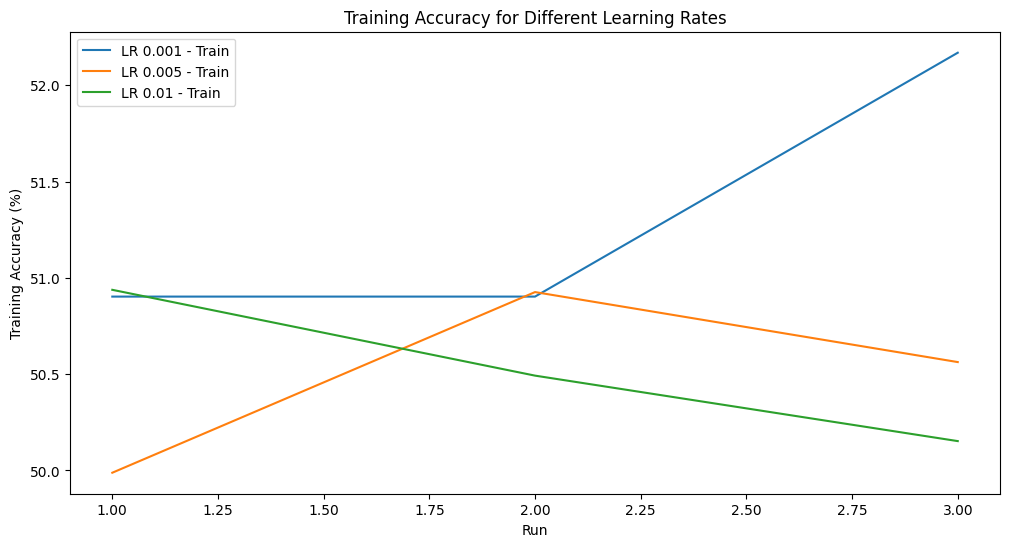

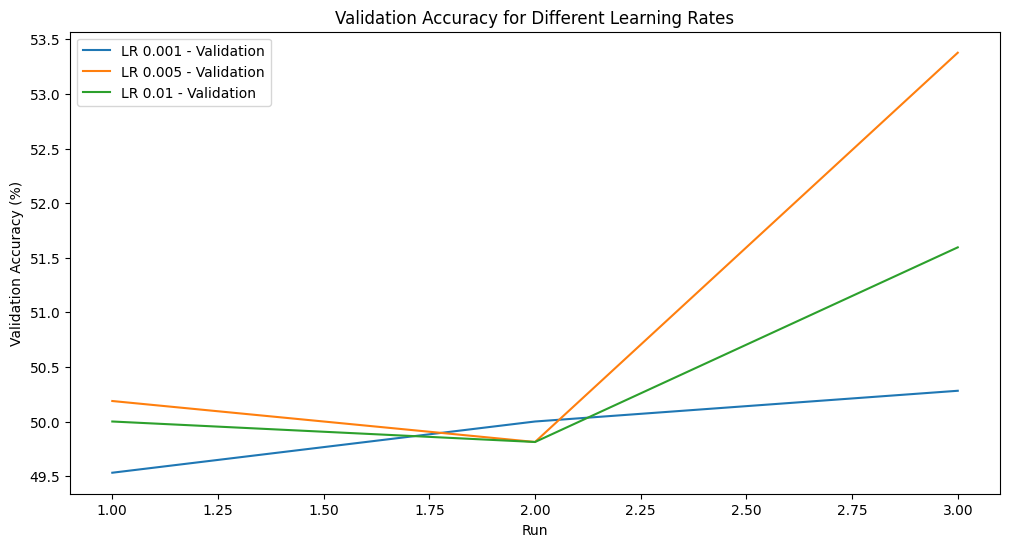

In [ ]:
train_model_multiple_learning_rates(RNN,
                                    train_loader,
                                    val_loader, device,
                                    model_name='rnn_model',
                                    num_runs=3,
                                    num_epochs=40)

In [ ]:
import RNN
importlib.reload(RNN)

<module 'RNN' from '/content/drive/MyDrive/SC4002 Natural Language Processing/RNN.py'>

In [ ]:
from RNN import RNN, train_model_rnn, train_model_multiple_batch_sizes

Training with batch size 16
Run 1/3
Learning Rate:  0.005


Epoch 1/40: 100%|██████████| 534/534 [00:22<00:00, 24.24it/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:714: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:1410.)
  result = _VF.rnn_tanh(


Epoch 1/40:
Training Loss: 11.7083
Training Accuracy: 50.05%
Validation Accuracy: 52.25%
Learning Rate: 0.004523
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 534/534 [00:22<00:00, 24.13it/s]


Epoch 2/40:
Training Loss: 11.6709
Training Accuracy: 50.45%
Validation Accuracy: 52.72%
Learning Rate: 0.003273
New best validation accuracy! Saving model...


Epoch 3/40: 100%|██████████| 534/534 [00:21<00:00, 24.29it/s]


Epoch 3/40:
Training Loss: 11.4590
Training Accuracy: 50.34%
Validation Accuracy: 51.13%
Learning Rate: 0.001728


Epoch 4/40: 100%|██████████| 534/534 [00:21<00:00, 24.38it/s]


Epoch 4/40:
Training Loss: 11.2478
Training Accuracy: 50.22%
Validation Accuracy: 52.44%
Learning Rate: 0.000478


Epoch 5/40: 100%|██████████| 534/534 [00:22<00:00, 23.86it/s]


Epoch 5/40:
Training Loss: 11.1487
Training Accuracy: 49.64%
Validation Accuracy: 52.63%
Learning Rate: 0.005000


Epoch 6/40: 100%|██████████| 534/534 [00:22<00:00, 23.99it/s]


Epoch 6/40:
Training Loss: 11.5734
Training Accuracy: 50.47%
Validation Accuracy: 52.53%
Learning Rate: 0.004878


Epoch 7/40: 100%|██████████| 534/534 [00:22<00:00, 23.84it/s]


Epoch 7/40:
Training Loss: 11.7194
Training Accuracy: 49.79%
Validation Accuracy: 52.53%
Learning Rate: 0.004523


Epoch 8/40: 100%|██████████| 534/534 [00:22<00:00, 23.95it/s]


Epoch 8/40:
Training Loss: 11.5817
Training Accuracy: 50.52%
Validation Accuracy: 52.63%
Learning Rate: 0.003970


Epoch 9/40: 100%|██████████| 534/534 [00:22<00:00, 23.68it/s]


Epoch 9/40:
Training Loss: 11.4702
Training Accuracy: 49.88%
Validation Accuracy: 52.44%
Learning Rate: 0.003273
Early stopping triggered after epoch 9
Run 2/3
Learning Rate:  0.005


Epoch 1/40: 100%|██████████| 534/534 [00:22<00:00, 24.06it/s]


Epoch 1/40:
Training Loss: 11.6300
Training Accuracy: 50.05%
Validation Accuracy: 50.38%
Learning Rate: 0.004523
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 534/534 [00:22<00:00, 24.26it/s]


Epoch 2/40:
Training Loss: 11.5493
Training Accuracy: 49.98%
Validation Accuracy: 48.78%
Learning Rate: 0.003273


Epoch 3/40: 100%|██████████| 534/534 [00:21<00:00, 24.29it/s]


Epoch 3/40:
Training Loss: 11.5377
Training Accuracy: 50.81%
Validation Accuracy: 50.00%
Learning Rate: 0.001728


Epoch 4/40: 100%|██████████| 534/534 [00:22<00:00, 24.24it/s]


Epoch 4/40:
Training Loss: 11.2577
Training Accuracy: 49.40%
Validation Accuracy: 50.00%
Learning Rate: 0.000478


Epoch 5/40: 100%|██████████| 534/534 [00:22<00:00, 23.85it/s]


Epoch 5/40:
Training Loss: 11.1305
Training Accuracy: 50.28%
Validation Accuracy: 50.19%
Learning Rate: 0.005000


Epoch 6/40: 100%|██████████| 534/534 [00:22<00:00, 23.97it/s]


Epoch 6/40:
Training Loss: 11.4660
Training Accuracy: 49.05%
Validation Accuracy: 49.72%
Learning Rate: 0.004878


Epoch 7/40: 100%|██████████| 534/534 [00:22<00:00, 23.98it/s]


Epoch 7/40:
Training Loss: 11.7242
Training Accuracy: 50.36%
Validation Accuracy: 49.62%
Learning Rate: 0.004523


Epoch 8/40: 100%|██████████| 534/534 [00:22<00:00, 23.95it/s]


Epoch 8/40:
Training Loss: 11.6155
Training Accuracy: 49.46%
Validation Accuracy: 49.44%
Learning Rate: 0.003970
Early stopping triggered after epoch 8
Run 3/3
Learning Rate:  0.005


Epoch 1/40: 100%|██████████| 534/534 [00:21<00:00, 24.30it/s]


Epoch 1/40:
Training Loss: 11.4884
Training Accuracy: 49.78%
Validation Accuracy: 50.09%
Learning Rate: 0.004523
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 534/534 [00:22<00:00, 24.24it/s]


Epoch 2/40:
Training Loss: 11.6359
Training Accuracy: 49.47%
Validation Accuracy: 51.22%
Learning Rate: 0.003273
New best validation accuracy! Saving model...


Epoch 3/40: 100%|██████████| 534/534 [00:21<00:00, 24.28it/s]


Epoch 3/40:
Training Loss: 11.4843
Training Accuracy: 50.01%
Validation Accuracy: 51.88%
Learning Rate: 0.001728
New best validation accuracy! Saving model...


Epoch 4/40: 100%|██████████| 534/534 [00:21<00:00, 24.36it/s]


Epoch 4/40:
Training Loss: 11.2467
Training Accuracy: 49.78%
Validation Accuracy: 51.41%
Learning Rate: 0.000478


Epoch 5/40: 100%|██████████| 534/534 [00:22<00:00, 23.89it/s]


Epoch 5/40:
Training Loss: 11.1406
Training Accuracy: 50.23%
Validation Accuracy: 51.13%
Learning Rate: 0.005000


Epoch 6/40: 100%|██████████| 534/534 [00:22<00:00, 23.99it/s]


Epoch 6/40:
Training Loss: 11.5946
Training Accuracy: 49.60%
Validation Accuracy: 51.41%
Learning Rate: 0.004878


Epoch 7/40: 100%|██████████| 534/534 [00:22<00:00, 23.85it/s]


Epoch 7/40:
Training Loss: 11.4917
Training Accuracy: 49.47%
Validation Accuracy: 48.78%
Learning Rate: 0.004523


Epoch 8/40: 100%|██████████| 534/534 [00:22<00:00, 23.83it/s]


Epoch 8/40:
Training Loss: 11.4674
Training Accuracy: 50.11%
Validation Accuracy: 48.87%
Learning Rate: 0.003970


Epoch 9/40: 100%|██████████| 534/534 [00:22<00:00, 24.00it/s]


Epoch 9/40:
Training Loss: 11.5360
Training Accuracy: 49.82%
Validation Accuracy: 48.97%
Learning Rate: 0.003273


Epoch 10/40: 100%|██████████| 534/534 [00:22<00:00, 23.87it/s]


Epoch 10/40:
Training Loss: 11.4112
Training Accuracy: 49.73%
Validation Accuracy: 50.09%
Learning Rate: 0.002501
Early stopping triggered after epoch 10
Training with batch size 64
Run 1/3
Learning Rate:  0.005


Epoch 1/40: 100%|██████████| 134/134 [00:20<00:00,  6.57it/s]


Epoch 1/40:
Training Loss: 45.7010
Training Accuracy: 49.99%
Validation Accuracy: 52.63%
Learning Rate: 0.004523
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 134/134 [00:20<00:00,  6.55it/s]


Epoch 2/40:
Training Loss: 44.8889
Training Accuracy: 50.18%
Validation Accuracy: 54.13%
Learning Rate: 0.003273
New best validation accuracy! Saving model...


Epoch 3/40: 100%|██████████| 134/134 [00:20<00:00,  6.53it/s]


Epoch 3/40:
Training Loss: 44.5801
Training Accuracy: 50.41%
Validation Accuracy: 54.60%
Learning Rate: 0.001728
New best validation accuracy! Saving model...


Epoch 4/40: 100%|██████████| 134/134 [00:20<00:00,  6.52it/s]


Epoch 4/40:
Training Loss: 44.3065
Training Accuracy: 51.93%
Validation Accuracy: 54.78%
Learning Rate: 0.000478
New best validation accuracy! Saving model...


Epoch 5/40: 100%|██████████| 134/134 [00:20<00:00,  6.51it/s]


Epoch 5/40:
Training Loss: 44.1872
Training Accuracy: 49.92%
Validation Accuracy: 55.35%
Learning Rate: 0.005000
New best validation accuracy! Saving model...


Epoch 6/40: 100%|██████████| 134/134 [00:20<00:00,  6.51it/s]


Epoch 6/40:
Training Loss: 44.7344
Training Accuracy: 50.43%
Validation Accuracy: 55.44%
Learning Rate: 0.004878
New best validation accuracy! Saving model...


Epoch 7/40: 100%|██████████| 134/134 [00:20<00:00,  6.51it/s]


Epoch 7/40:
Training Loss: 45.0407
Training Accuracy: 49.96%
Validation Accuracy: 55.82%
Learning Rate: 0.004523
New best validation accuracy! Saving model...


Epoch 8/40: 100%|██████████| 134/134 [00:20<00:00,  6.47it/s]


Epoch 8/40:
Training Loss: 44.7049
Training Accuracy: 50.43%
Validation Accuracy: 55.91%
Learning Rate: 0.003970
New best validation accuracy! Saving model...


Epoch 9/40: 100%|██████████| 134/134 [00:20<00:00,  6.51it/s]


Epoch 9/40:
Training Loss: 44.7911
Training Accuracy: 51.50%
Validation Accuracy: 55.72%
Learning Rate: 0.003273


Epoch 10/40: 100%|██████████| 134/134 [00:20<00:00,  6.55it/s]


Epoch 10/40:
Training Loss: 44.5986
Training Accuracy: 51.93%
Validation Accuracy: 55.72%
Learning Rate: 0.002501


Epoch 11/40: 100%|██████████| 134/134 [00:20<00:00,  6.47it/s]


Epoch 11/40:
Training Loss: 44.5091
Training Accuracy: 50.60%
Validation Accuracy: 55.82%
Learning Rate: 0.001728


Epoch 12/40: 100%|██████████| 134/134 [00:20<00:00,  6.50it/s]


Epoch 12/40:
Training Loss: 44.2667
Training Accuracy: 51.63%
Validation Accuracy: 55.53%
Learning Rate: 0.001031


Epoch 13/40: 100%|██████████| 134/134 [00:20<00:00,  6.48it/s]


Epoch 13/40:
Training Loss: 44.2088
Training Accuracy: 50.83%
Validation Accuracy: 55.53%
Learning Rate: 0.000478


Epoch 14/40: 100%|██████████| 134/134 [00:20<00:00,  6.53it/s]


Epoch 14/40:
Training Loss: 44.1153
Training Accuracy: 50.74%
Validation Accuracy: 55.25%
Learning Rate: 0.000123


Epoch 15/40: 100%|██████████| 134/134 [00:20<00:00,  6.50it/s]


Epoch 15/40:
Training Loss: 44.0749
Training Accuracy: 51.04%
Validation Accuracy: 55.16%
Learning Rate: 0.005000
Early stopping triggered after epoch 15
Run 2/3
Learning Rate:  0.005


Epoch 1/40: 100%|██████████| 134/134 [00:20<00:00,  6.51it/s]


Epoch 1/40:
Training Loss: 45.0109
Training Accuracy: 49.57%
Validation Accuracy: 50.19%
Learning Rate: 0.004523
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 134/134 [00:20<00:00,  6.56it/s]


Epoch 2/40:
Training Loss: 44.5337
Training Accuracy: 50.63%
Validation Accuracy: 50.09%
Learning Rate: 0.003273


Epoch 3/40: 100%|██████████| 134/134 [00:20<00:00,  6.55it/s]


Epoch 3/40:
Training Loss: 44.3942
Training Accuracy: 49.96%
Validation Accuracy: 49.81%
Learning Rate: 0.001728


Epoch 4/40: 100%|██████████| 134/134 [00:20<00:00,  6.55it/s]


Epoch 4/40:
Training Loss: 44.1901
Training Accuracy: 49.89%
Validation Accuracy: 49.81%
Learning Rate: 0.000478


Epoch 5/40: 100%|██████████| 134/134 [00:20<00:00,  6.49it/s]


Epoch 5/40:
Training Loss: 44.1377
Training Accuracy: 51.06%
Validation Accuracy: 49.81%
Learning Rate: 0.005000


Epoch 6/40: 100%|██████████| 134/134 [00:20<00:00,  6.49it/s]


Epoch 6/40:
Training Loss: 44.7275
Training Accuracy: 50.26%
Validation Accuracy: 49.81%
Learning Rate: 0.004878


Epoch 7/40: 100%|██████████| 134/134 [00:20<00:00,  6.50it/s]


Epoch 7/40:
Training Loss: 45.7614
Training Accuracy: 49.59%
Validation Accuracy: 50.28%
Learning Rate: 0.004523
New best validation accuracy! Saving model...


Epoch 8/40: 100%|██████████| 134/134 [00:20<00:00,  6.51it/s]


Epoch 8/40:
Training Loss: 44.8769
Training Accuracy: 49.98%
Validation Accuracy: 50.28%
Learning Rate: 0.003970


Epoch 9/40: 100%|██████████| 134/134 [00:20<00:00,  6.47it/s]


Epoch 9/40:
Training Loss: 44.7213
Training Accuracy: 49.10%
Validation Accuracy: 50.19%
Learning Rate: 0.003273


Epoch 10/40: 100%|██████████| 134/134 [00:20<00:00,  6.50it/s]


Epoch 10/40:
Training Loss: 44.6863
Training Accuracy: 49.72%
Validation Accuracy: 50.09%
Learning Rate: 0.002501


Epoch 11/40: 100%|██████████| 134/134 [00:20<00:00,  6.53it/s]


Epoch 11/40:
Training Loss: 44.4017
Training Accuracy: 49.93%
Validation Accuracy: 50.09%
Learning Rate: 0.001728


Epoch 12/40: 100%|██████████| 134/134 [00:20<00:00,  6.53it/s]


Epoch 12/40:
Training Loss: 44.2840
Training Accuracy: 50.55%
Validation Accuracy: 50.09%
Learning Rate: 0.001031


Epoch 13/40: 100%|██████████| 134/134 [00:20<00:00,  6.52it/s]


Epoch 13/40:
Training Loss: 44.2262
Training Accuracy: 49.98%
Validation Accuracy: 50.00%
Learning Rate: 0.000478


Epoch 14/40: 100%|██████████| 134/134 [00:20<00:00,  6.53it/s]


Epoch 14/40:
Training Loss: 44.1958
Training Accuracy: 50.22%
Validation Accuracy: 50.00%
Learning Rate: 0.000123
Early stopping triggered after epoch 14
Run 3/3
Learning Rate:  0.005


Epoch 1/40: 100%|██████████| 134/134 [00:20<00:00,  6.58it/s]


Epoch 1/40:
Training Loss: 44.2550
Training Accuracy: 49.43%
Validation Accuracy: 50.09%
Learning Rate: 0.004523
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 134/134 [00:20<00:00,  6.56it/s]


Epoch 2/40:
Training Loss: 45.3257
Training Accuracy: 49.72%
Validation Accuracy: 50.38%
Learning Rate: 0.003273
New best validation accuracy! Saving model...


Epoch 3/40: 100%|██████████| 134/134 [00:20<00:00,  6.53it/s]


Epoch 3/40:
Training Loss: 44.9763
Training Accuracy: 49.52%
Validation Accuracy: 49.34%
Learning Rate: 0.001728


Epoch 4/40: 100%|██████████| 134/134 [00:20<00:00,  6.57it/s]


Epoch 4/40:
Training Loss: 44.6567
Training Accuracy: 49.79%
Validation Accuracy: 49.72%
Learning Rate: 0.000478


Epoch 5/40: 100%|██████████| 134/134 [00:20<00:00,  6.52it/s]


Epoch 5/40:
Training Loss: 44.2230
Training Accuracy: 49.64%
Validation Accuracy: 49.62%
Learning Rate: 0.005000


Epoch 6/40: 100%|██████████| 134/134 [00:20<00:00,  6.52it/s]


Epoch 6/40:
Training Loss: 45.0244
Training Accuracy: 50.12%
Validation Accuracy: 49.53%
Learning Rate: 0.004878


Epoch 7/40: 100%|██████████| 134/134 [00:20<00:00,  6.53it/s]


Epoch 7/40:
Training Loss: 44.8573
Training Accuracy: 50.56%
Validation Accuracy: 49.53%
Learning Rate: 0.004523


Epoch 8/40: 100%|██████████| 134/134 [00:20<00:00,  6.50it/s]


Epoch 8/40:
Training Loss: 44.5860
Training Accuracy: 50.82%
Validation Accuracy: 49.62%
Learning Rate: 0.003970


Epoch 9/40: 100%|██████████| 134/134 [00:20<00:00,  6.48it/s]


Epoch 9/40:
Training Loss: 44.8870
Training Accuracy: 49.13%
Validation Accuracy: 49.62%
Learning Rate: 0.003273
Early stopping triggered after epoch 9
Training with batch size 32
Run 1/3
Learning Rate:  0.005


Epoch 1/40: 100%|██████████| 267/267 [00:21<00:00, 12.71it/s]


Epoch 1/40:
Training Loss: 22.9423
Training Accuracy: 50.87%
Validation Accuracy: 48.22%
Learning Rate: 0.004523
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:21<00:00, 12.65it/s]


Epoch 2/40:
Training Loss: 22.6642
Training Accuracy: 51.07%
Validation Accuracy: 50.09%
Learning Rate: 0.003273
New best validation accuracy! Saving model...


Epoch 3/40: 100%|██████████| 267/267 [00:21<00:00, 12.67it/s]


Epoch 3/40:
Training Loss: 22.5133
Training Accuracy: 50.09%
Validation Accuracy: 50.09%
Learning Rate: 0.001728


Epoch 4/40: 100%|██████████| 267/267 [00:21<00:00, 12.59it/s]


Epoch 4/40:
Training Loss: 22.4650
Training Accuracy: 50.11%
Validation Accuracy: 51.03%
Learning Rate: 0.000478
New best validation accuracy! Saving model...


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.59it/s]


Epoch 5/40:
Training Loss: 22.2147
Training Accuracy: 50.21%
Validation Accuracy: 51.03%
Learning Rate: 0.005000


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.52it/s]


Epoch 6/40:
Training Loss: 22.6005
Training Accuracy: 50.39%
Validation Accuracy: 51.03%
Learning Rate: 0.004878


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.53it/s]


Epoch 7/40:
Training Loss: 22.7879
Training Accuracy: 48.83%
Validation Accuracy: 51.03%
Learning Rate: 0.004523


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.62it/s]


Epoch 8/40:
Training Loss: 22.7266
Training Accuracy: 49.74%
Validation Accuracy: 50.09%
Learning Rate: 0.003970


Epoch 9/40: 100%|██████████| 267/267 [00:21<00:00, 12.52it/s]


Epoch 9/40:
Training Loss: 22.5867
Training Accuracy: 50.34%
Validation Accuracy: 51.13%
Learning Rate: 0.003273
New best validation accuracy! Saving model...


Epoch 10/40: 100%|██████████| 267/267 [00:21<00:00, 12.61it/s]


Epoch 10/40:
Training Loss: 22.8140
Training Accuracy: 50.32%
Validation Accuracy: 50.00%
Learning Rate: 0.002501


Epoch 11/40: 100%|██████████| 267/267 [00:21<00:00, 12.64it/s]


Epoch 11/40:
Training Loss: 22.7184
Training Accuracy: 50.46%
Validation Accuracy: 50.84%
Learning Rate: 0.001728


Epoch 12/40: 100%|██████████| 267/267 [00:21<00:00, 12.65it/s]


Epoch 12/40:
Training Loss: 22.5845
Training Accuracy: 50.11%
Validation Accuracy: 54.69%
Learning Rate: 0.001031
New best validation accuracy! Saving model...


Epoch 13/40: 100%|██████████| 267/267 [00:21<00:00, 12.60it/s]


Epoch 13/40:
Training Loss: 22.2792
Training Accuracy: 49.73%
Validation Accuracy: 53.75%
Learning Rate: 0.000478


Epoch 14/40: 100%|██████████| 267/267 [00:21<00:00, 12.68it/s]


Epoch 14/40:
Training Loss: 22.2151
Training Accuracy: 49.74%
Validation Accuracy: 51.50%
Learning Rate: 0.000123


Epoch 15/40: 100%|██████████| 267/267 [00:21<00:00, 12.63it/s]


Epoch 15/40:
Training Loss: 22.1588
Training Accuracy: 50.39%
Validation Accuracy: 51.13%
Learning Rate: 0.005000


Epoch 16/40: 100%|██████████| 267/267 [00:21<00:00, 12.70it/s]


Epoch 16/40:
Training Loss: 22.8426
Training Accuracy: 50.05%
Validation Accuracy: 50.38%
Learning Rate: 0.004969


Epoch 17/40: 100%|██████████| 267/267 [00:21<00:00, 12.66it/s]


Epoch 17/40:
Training Loss: 23.2024
Training Accuracy: 50.04%
Validation Accuracy: 50.66%
Learning Rate: 0.004878


Epoch 18/40: 100%|██████████| 267/267 [00:21<00:00, 12.65it/s]


Epoch 18/40:
Training Loss: 22.8688
Training Accuracy: 51.06%
Validation Accuracy: 50.28%
Learning Rate: 0.004728


Epoch 19/40: 100%|██████████| 267/267 [00:21<00:00, 12.64it/s]


Epoch 19/40:
Training Loss: 22.6867
Training Accuracy: 50.48%
Validation Accuracy: 50.19%
Learning Rate: 0.004523
Early stopping triggered after epoch 19
Run 2/3
Learning Rate:  0.005


Epoch 1/40: 100%|██████████| 267/267 [00:21<00:00, 12.68it/s]


Epoch 1/40:
Training Loss: 22.6401
Training Accuracy: 50.32%
Validation Accuracy: 48.69%
Learning Rate: 0.004523
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:20<00:00, 12.73it/s]


Epoch 2/40:
Training Loss: 22.6246
Training Accuracy: 50.61%
Validation Accuracy: 51.13%
Learning Rate: 0.003273
New best validation accuracy! Saving model...


Epoch 3/40: 100%|██████████| 267/267 [00:21<00:00, 12.71it/s]


Epoch 3/40:
Training Loss: 22.4825
Training Accuracy: 51.42%
Validation Accuracy: 51.22%
Learning Rate: 0.001728
New best validation accuracy! Saving model...


Epoch 4/40: 100%|██████████| 267/267 [00:21<00:00, 12.70it/s]


Epoch 4/40:
Training Loss: 22.3135
Training Accuracy: 51.02%
Validation Accuracy: 51.31%
Learning Rate: 0.000478
New best validation accuracy! Saving model...


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.64it/s]


Epoch 5/40:
Training Loss: 22.1787
Training Accuracy: 51.00%
Validation Accuracy: 51.22%
Learning Rate: 0.005000


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.60it/s]


Epoch 6/40:
Training Loss: 23.4341
Training Accuracy: 51.16%
Validation Accuracy: 51.22%
Learning Rate: 0.004878


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.62it/s]


Epoch 7/40:
Training Loss: 23.0560
Training Accuracy: 48.73%
Validation Accuracy: 51.22%
Learning Rate: 0.004523


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.62it/s]


Epoch 8/40:
Training Loss: 22.6979
Training Accuracy: 50.76%
Validation Accuracy: 51.69%
Learning Rate: 0.003970
New best validation accuracy! Saving model...


Epoch 9/40: 100%|██████████| 267/267 [00:21<00:00, 12.64it/s]


Epoch 9/40:
Training Loss: 22.5221
Training Accuracy: 49.74%
Validation Accuracy: 49.81%
Learning Rate: 0.003273


Epoch 10/40: 100%|██████████| 267/267 [00:21<00:00, 12.64it/s]


Epoch 10/40:
Training Loss: 22.5847
Training Accuracy: 50.50%
Validation Accuracy: 50.28%
Learning Rate: 0.002501


Epoch 11/40: 100%|██████████| 267/267 [00:21<00:00, 12.63it/s]


Epoch 11/40:
Training Loss: 22.4737
Training Accuracy: 49.38%
Validation Accuracy: 50.00%
Learning Rate: 0.001728


Epoch 12/40: 100%|██████████| 267/267 [00:21<00:00, 12.64it/s]


Epoch 12/40:
Training Loss: 22.3305
Training Accuracy: 50.56%
Validation Accuracy: 50.00%
Learning Rate: 0.001031


Epoch 13/40: 100%|██████████| 267/267 [00:21<00:00, 12.65it/s]


Epoch 13/40:
Training Loss: 22.3213
Training Accuracy: 49.50%
Validation Accuracy: 50.00%
Learning Rate: 0.000478


Epoch 14/40: 100%|██████████| 267/267 [00:21<00:00, 12.59it/s]


Epoch 14/40:
Training Loss: 22.1874
Training Accuracy: 49.81%
Validation Accuracy: 50.00%
Learning Rate: 0.000123


Epoch 15/40: 100%|██████████| 267/267 [00:21<00:00, 12.66it/s]


Epoch 15/40:
Training Loss: 22.1560
Training Accuracy: 49.77%
Validation Accuracy: 50.00%
Learning Rate: 0.005000
Early stopping triggered after epoch 15
Run 3/3
Learning Rate:  0.005


Epoch 1/40: 100%|██████████| 267/267 [00:20<00:00, 12.75it/s]


Epoch 1/40:
Training Loss: 23.0727
Training Accuracy: 49.88%
Validation Accuracy: 48.50%
Learning Rate: 0.004523
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 267/267 [00:20<00:00, 12.74it/s]


Epoch 2/40:
Training Loss: 22.8672
Training Accuracy: 50.27%
Validation Accuracy: 50.00%
Learning Rate: 0.003273
New best validation accuracy! Saving model...


Epoch 3/40: 100%|██████████| 267/267 [00:20<00:00, 12.79it/s]


Epoch 3/40:
Training Loss: 22.6438
Training Accuracy: 51.02%
Validation Accuracy: 51.03%
Learning Rate: 0.001728
New best validation accuracy! Saving model...


Epoch 4/40: 100%|██████████| 267/267 [00:20<00:00, 12.73it/s]


Epoch 4/40:
Training Loss: 22.3965
Training Accuracy: 50.30%
Validation Accuracy: 49.81%
Learning Rate: 0.000478


Epoch 5/40: 100%|██████████| 267/267 [00:21<00:00, 12.60it/s]


Epoch 5/40:
Training Loss: 22.2286
Training Accuracy: 49.36%
Validation Accuracy: 50.38%
Learning Rate: 0.005000


Epoch 6/40: 100%|██████████| 267/267 [00:21<00:00, 12.54it/s]


Epoch 6/40:
Training Loss: 22.8051
Training Accuracy: 49.99%
Validation Accuracy: 50.84%
Learning Rate: 0.004878


Epoch 7/40: 100%|██████████| 267/267 [00:21<00:00, 12.62it/s]


Epoch 7/40:
Training Loss: 22.7720
Training Accuracy: 49.40%
Validation Accuracy: 50.56%
Learning Rate: 0.004523


Epoch 8/40: 100%|██████████| 267/267 [00:21<00:00, 12.57it/s]


Epoch 8/40:
Training Loss: 22.8701
Training Accuracy: 49.31%
Validation Accuracy: 50.56%
Learning Rate: 0.003970


Epoch 9/40: 100%|██████████| 267/267 [00:21<00:00, 12.63it/s]


Epoch 9/40:
Training Loss: 22.7966
Training Accuracy: 50.01%
Validation Accuracy: 50.84%
Learning Rate: 0.003273


Epoch 10/40: 100%|██████████| 267/267 [00:21<00:00, 12.71it/s]


Epoch 10/40:
Training Loss: 22.7657
Training Accuracy: 51.09%
Validation Accuracy: 50.66%
Learning Rate: 0.002501
Early stopping triggered after epoch 10


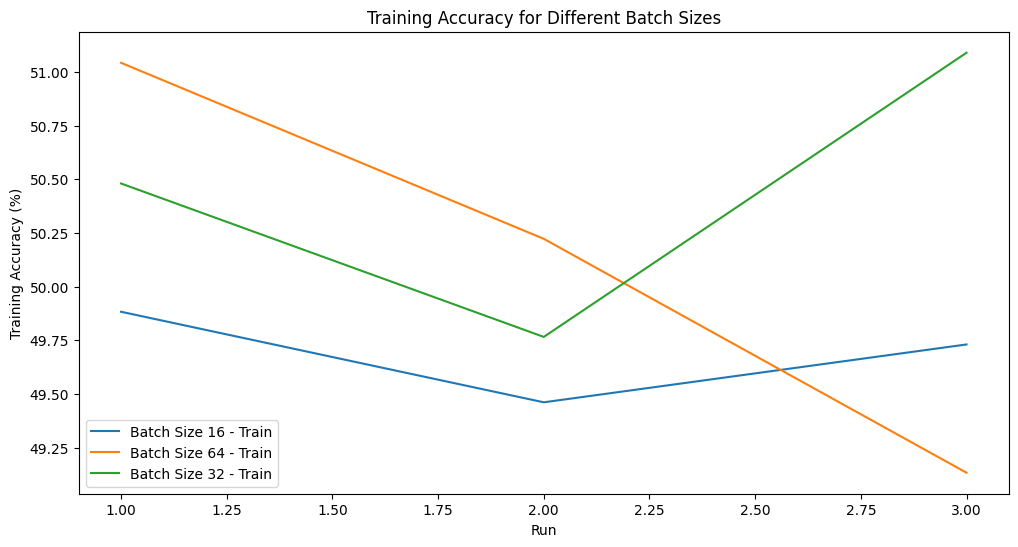

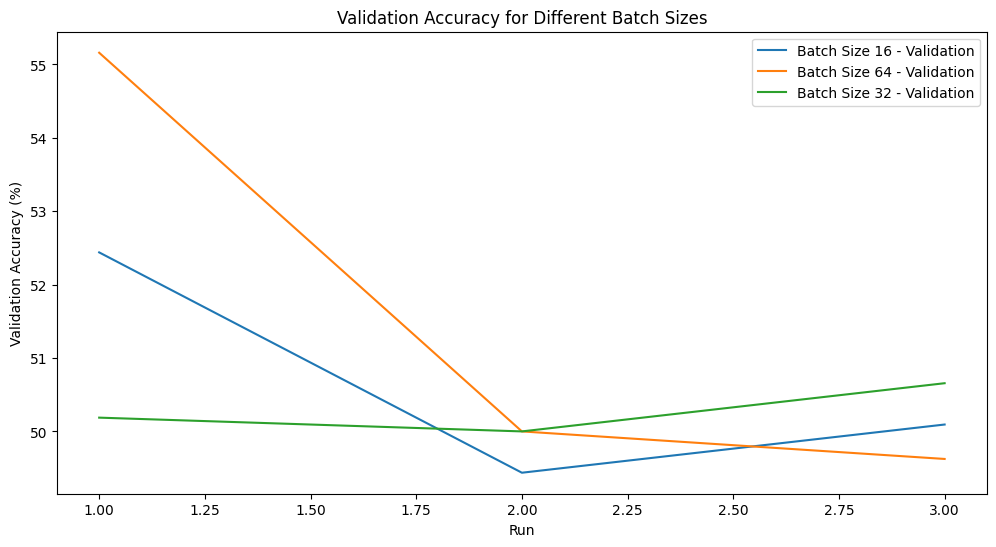

In [ ]:
train_model_multiple_batch_sizes(RNN,
                                 train_data = train_dataset,
                                 val_data = val_dataset,
                                 device = device,
                                 model_name = 'rnn_model',
                                 num_runs=3,
                                 num_epochs=40)

In [ ]:
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
import RNN
importlib.reload(RNN)

<module 'RNN' from '/content/drive/MyDrive/SC4002 Natural Language Processing/RNN.py'>

In [ ]:
from RNN import RNN, RNNWithPooling, train_model_rnn

# 2b) Report the accuracy score on the test set, as well as the accuracy score on the validation set for each epoch during training.

In [ ]:
model = RNN()

# Train model with max pooling, learning rate 0.005, and Adam optimizer
history, early_stop_epoch, early_stop_history = train_model_rnn(
    model, train_loader, val_loader, num_epochs=40, device=device, model_name='rnn_with_optimised_values', learning_rate=0.005, optimizer_type='Adam'
)

print(early_stop_history)

Learning Rate:  0.005


Epoch 1/40: 100%|██████████| 134/134 [00:20<00:00,  6.54it/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:714: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:1410.)
  result = _VF.rnn_tanh(


Epoch 1/40:
Training Loss: 46.0271
Training Accuracy: 50.46%
Validation Accuracy: 51.13%
Learning Rate: 0.004523
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 134/134 [00:20<00:00,  6.57it/s]


Epoch 2/40:
Training Loss: 44.9015
Training Accuracy: 50.96%
Validation Accuracy: 49.16%
Learning Rate: 0.003273


Epoch 3/40: 100%|██████████| 134/134 [00:20<00:00,  6.54it/s]


Epoch 3/40:
Training Loss: 44.5202
Training Accuracy: 50.21%
Validation Accuracy: 49.16%
Learning Rate: 0.001728


Epoch 4/40: 100%|██████████| 134/134 [00:20<00:00,  6.54it/s]


Epoch 4/40:
Training Loss: 44.3606
Training Accuracy: 50.83%
Validation Accuracy: 49.53%
Learning Rate: 0.000478


Epoch 5/40: 100%|██████████| 134/134 [00:20<00:00,  6.52it/s]


Epoch 5/40:
Training Loss: 44.1764
Training Accuracy: 50.75%
Validation Accuracy: 49.34%
Learning Rate: 0.005000


Epoch 6/40: 100%|██████████| 134/134 [00:20<00:00,  6.54it/s]


Epoch 6/40:
Training Loss: 45.1620
Training Accuracy: 49.31%
Validation Accuracy: 49.25%
Learning Rate: 0.004878


Epoch 7/40: 100%|██████████| 134/134 [00:20<00:00,  6.54it/s]


Epoch 7/40:
Training Loss: 45.2713
Training Accuracy: 50.19%
Validation Accuracy: 50.00%
Learning Rate: 0.004523


Epoch 8/40: 100%|██████████| 134/134 [00:20<00:00,  6.56it/s]


Epoch 8/40:
Training Loss: 45.1550
Training Accuracy: 49.67%
Validation Accuracy: 47.37%
Learning Rate: 0.003970
Early stopping triggered after epoch 8
{'train_loss': [46.027052126713656, 44.901535856190016, 44.52021504782919, 44.36062389523236, 44.176447469796706, 45.16202297673296, 45.27129571117572, 45.15497265022192], 'train_acc': [50.457209847596715, 50.961313012895666, 50.211019929660026, 50.83235638921454, 50.75029308323564, 49.308323563892145, 50.18757327080891, 49.671746776084404], 'val_acc': [51.12570356472796, 49.15572232645403, 49.15572232645403, 49.530956848030016, 49.34333958724203, 49.24953095684803, 50.0, 47.373358348968104], 'lr': [0.004522637977440181, 0.0032728879774401812, 0.001728112022559819, 0.00047836202255981916, 0.005, 0.004877665762479736, 0.004522637977440181, 0.003969669238105037]}


In [ ]:
model_max = RNNWithPooling(pooling_type='max')

# Train model with max pooling, learning rate 0.005, and Adam optimizer
history_max_pooling, early_stop_epoch_max_pooling, early_stop_history_max_pooling = train_model_rnn(
    model, train_loader, val_loader, num_epochs=40, device=device, model_name='rnn_with_max_pooling', learning_rate=0.005, optimizer_type='Adam'
)

print(early_stop_history_max_pooling)

Learning Rate:  0.005


Epoch 1/40: 100%|██████████| 134/134 [00:20<00:00,  6.57it/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:714: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:1410.)
  result = _VF.rnn_tanh(


Epoch 1/40:
Training Loss: 21.6380
Training Accuracy: 92.18%
Validation Accuracy: 75.89%
Learning Rate: 0.004523
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 134/134 [00:20<00:00,  6.57it/s]


Epoch 2/40:
Training Loss: 18.9780
Training Accuracy: 95.49%
Validation Accuracy: 75.89%
Learning Rate: 0.003273


Epoch 3/40: 100%|██████████| 134/134 [00:20<00:00,  6.53it/s]


Epoch 3/40:
Training Loss: 16.2063
Training Accuracy: 98.71%
Validation Accuracy: 76.55%
Learning Rate: 0.001728
New best validation accuracy! Saving model...


Epoch 4/40: 100%|██████████| 134/134 [00:20<00:00,  6.55it/s]


Epoch 4/40:
Training Loss: 14.2808
Training Accuracy: 99.94%
Validation Accuracy: 76.36%
Learning Rate: 0.000478


Epoch 5/40: 100%|██████████| 134/134 [00:20<00:00,  6.54it/s]


Epoch 5/40:
Training Loss: 20.6808
Training Accuracy: 78.63%
Validation Accuracy: 75.98%
Learning Rate: 0.005000


Epoch 6/40: 100%|██████████| 134/134 [00:20<00:00,  6.49it/s]


Epoch 6/40:
Training Loss: 25.1728
Training Accuracy: 74.04%
Validation Accuracy: 76.64%
Learning Rate: 0.004878
New best validation accuracy! Saving model...


Epoch 7/40: 100%|██████████| 134/134 [00:20<00:00,  6.53it/s]


Epoch 7/40:
Training Loss: 25.6661
Training Accuracy: 73.22%
Validation Accuracy: 75.98%
Learning Rate: 0.004523


Epoch 8/40: 100%|██████████| 134/134 [00:20<00:00,  6.54it/s]


Epoch 8/40:
Training Loss: 26.1234
Training Accuracy: 75.04%
Validation Accuracy: 75.61%
Learning Rate: 0.003970


Epoch 9/40: 100%|██████████| 134/134 [00:20<00:00,  6.53it/s]


Epoch 9/40:
Training Loss: 23.9545
Training Accuracy: 73.34%
Validation Accuracy: 75.33%
Learning Rate: 0.003273


Epoch 10/40: 100%|██████████| 134/134 [00:20<00:00,  6.55it/s]


Epoch 10/40:
Training Loss: 22.7549
Training Accuracy: 72.90%
Validation Accuracy: 75.52%
Learning Rate: 0.002501


Epoch 11/40: 100%|██████████| 134/134 [00:20<00:00,  6.52it/s]


Epoch 11/40:
Training Loss: 21.5196
Training Accuracy: 78.41%
Validation Accuracy: 75.89%
Learning Rate: 0.001728


Epoch 12/40: 100%|██████████| 134/134 [00:20<00:00,  6.50it/s]


Epoch 12/40:
Training Loss: 21.0656
Training Accuracy: 74.88%
Validation Accuracy: 75.70%
Learning Rate: 0.001031


Epoch 13/40: 100%|██████████| 134/134 [00:20<00:00,  6.54it/s]


Epoch 13/40:
Training Loss: 21.8053
Training Accuracy: 76.03%
Validation Accuracy: 76.08%
Learning Rate: 0.000478
Early stopping triggered after epoch 13
{'train_loss': [21.63799808185492, 18.97796723557942, 16.206264595932037, 14.280807515578484, 20.680797377406662, 25.172814280239503, 25.666116332829887, 26.12337837824181, 23.954487106693325, 22.754862732406874, 21.519625218946544, 21.065643598339452, 21.80527849206284], 'train_acc': [92.18053927315357, 95.48651817116061, 98.71043376318875, 99.94138335287222, 78.62837045720985, 74.04454865181711, 73.22391559202813, 75.04103165298945, 73.3411488862837, 72.89566236811254, 78.40562719812426, 74.87690504103165, 76.02579132473622], 'val_acc': [75.89118198874296, 75.89118198874296, 76.54784240150094, 76.36022514071294, 75.98499061913697, 76.64165103189494, 75.98499061913697, 75.60975609756098, 75.328330206379, 75.51594746716698, 75.89118198874296, 75.70356472795497, 76.07879924953096], 'lr': [0.004522637977440181, 0.0032728879774401812, 0.

In [ ]:
model_avg = RNNWithPooling(pooling_type='avg')

# Train model with avg pooling, learning rate 0.005, and Adam optimizer
history_avg_pooling, early_stop_epoch_avg_pooling, early_stop_history_avg_pooling = train_model_rnn(
    model, train_loader, val_loader, num_epochs=40, device=device, model_name='rnn_with_avg_pooling', learning_rate=0.005, optimizer_type='Adam'
)

print(early_stop_history_avg_pooling)

Learning Rate:  0.005


Epoch 1/40: 100%|██████████| 134/134 [00:20<00:00,  6.54it/s]


Epoch 1/40:
Training Loss: 16.8053
Training Accuracy: 97.82%
Validation Accuracy: 75.80%
Learning Rate: 0.004523
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 134/134 [00:20<00:00,  6.56it/s]


Epoch 2/40:
Training Loss: 16.7450
Training Accuracy: 97.91%
Validation Accuracy: 74.39%
Learning Rate: 0.003273


Epoch 3/40: 100%|██████████| 134/134 [00:20<00:00,  6.58it/s]


Epoch 3/40:
Training Loss: 15.2578
Training Accuracy: 99.31%
Validation Accuracy: 74.02%
Learning Rate: 0.001728


Epoch 4/40: 100%|██████████| 134/134 [00:20<00:00,  6.56it/s]


Epoch 4/40:
Training Loss: 13.8182
Training Accuracy: 99.93%
Validation Accuracy: 74.20%
Learning Rate: 0.000478


Epoch 5/40: 100%|██████████| 134/134 [00:20<00:00,  6.56it/s]


Epoch 5/40:
Training Loss: 19.6636
Training Accuracy: 78.44%
Validation Accuracy: 73.45%
Learning Rate: 0.005000


Epoch 6/40: 100%|██████████| 134/134 [00:20<00:00,  6.47it/s]


Epoch 6/40:
Training Loss: 24.9859
Training Accuracy: 72.94%
Validation Accuracy: 73.36%
Learning Rate: 0.004878


Epoch 7/40: 100%|██████████| 134/134 [00:20<00:00,  6.44it/s]


Epoch 7/40:
Training Loss: 26.7457
Training Accuracy: 72.51%
Validation Accuracy: 74.39%
Learning Rate: 0.004523


Epoch 8/40: 100%|██████████| 134/134 [00:20<00:00,  6.49it/s]


Epoch 8/40:
Training Loss: 24.8568
Training Accuracy: 72.94%
Validation Accuracy: 74.39%
Learning Rate: 0.003970
Early stopping triggered after epoch 8
{'train_loss': [16.805284914240907, 16.74500103984306, 15.257761690154004, 13.81816166683809, 19.663632755848898, 24.985877943572714, 26.745732469345207, 24.856829154847272], 'train_acc': [97.81946072684643, 97.91324736225089, 99.30832356389215, 99.92966002344666, 78.44079718640094, 72.94255568581477, 72.50879249706917, 72.94255568581477], 'val_acc': [75.79737335834896, 74.39024390243902, 74.01500938086303, 74.20262664165104, 73.45215759849906, 73.35834896810506, 74.39024390243902, 74.39024390243902], 'lr': [0.004522637977440181, 0.0032728879774401812, 0.001728112022559819, 0.00047836202255981916, 0.005, 0.004877665762479736, 0.004522637977440181, 0.003969669238105037]}


# 2c) RNNs produce a hidden vector for each word, instead of the entire sentence. Which methods have you tried in deriving the final sentence representation to perform sentiment classification? Describe all the strategies you have implemented, together with their accuracy scores on the test set.

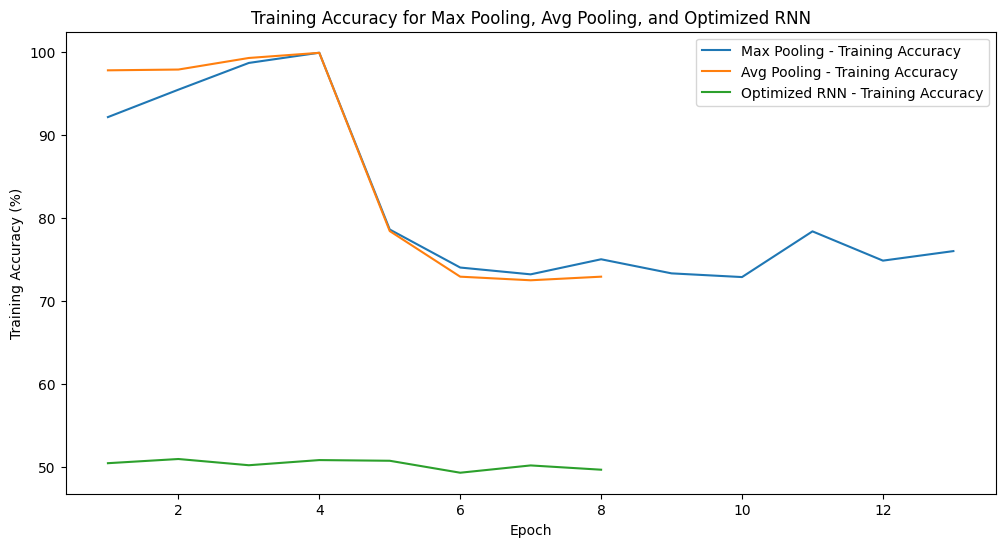

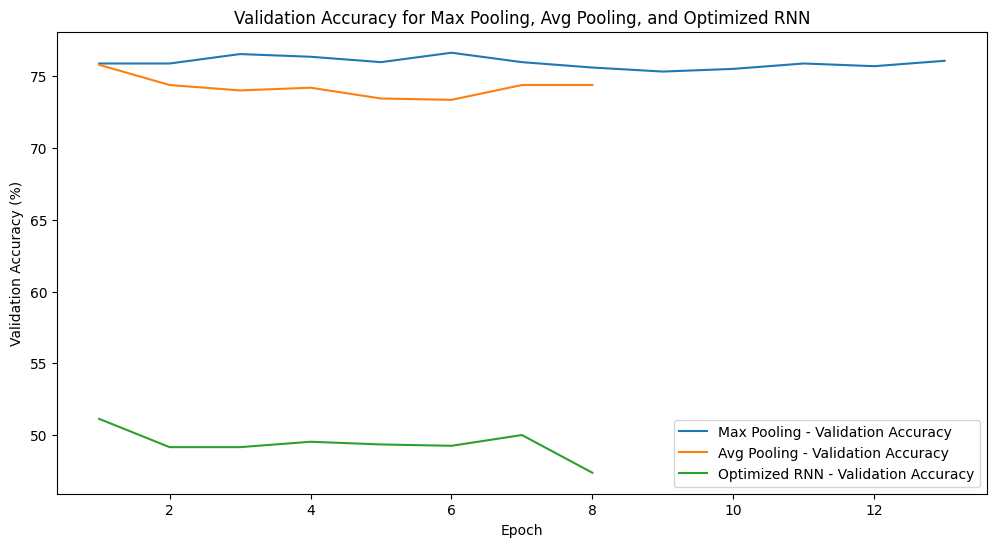

In [ ]:
import matplotlib.pyplot as plt

# Plot training accuracy for max pooling, avg pooling, and default RNN
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(early_stop_history_max_pooling['train_acc']) + 1), early_stop_history_max_pooling['train_acc'], label='Max Pooling - Training Accuracy')
plt.plot(range(1, len(early_stop_history_avg_pooling['train_acc']) + 1), early_stop_history_avg_pooling['train_acc'], label='Avg Pooling - Training Accuracy')
plt.plot(range(1, len(early_stop_history['train_acc']) + 1), early_stop_history['train_acc'], label='Optimized RNN - Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy (%)')
plt.title('Training Accuracy for Max Pooling, Avg Pooling, and Optimized RNN')
plt.legend()
plt.show()

# Plot validation accuracy for max pooling, avg pooling, and default RNN
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(early_stop_history_max_pooling['val_acc']) + 1), early_stop_history_max_pooling['val_acc'], label='Max Pooling - Validation Accuracy')
plt.plot(range(1, len(early_stop_history_avg_pooling['val_acc']) + 1), early_stop_history_avg_pooling['val_acc'], label='Avg Pooling - Validation Accuracy')
plt.plot(range(1, len(early_stop_history['val_acc']) + 1), early_stop_history['val_acc'], label='Optimized RNN - Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy (%)')
plt.title('Validation Accuracy for Max Pooling, Avg Pooling, and Optimized RNN')
plt.legend()
plt.show()

In [ ]:
import RNN
importlib.reload(RNN)

<module 'RNN' from '/content/drive/MyDrive/SC4002 Natural Language Processing/RNN.py'>

In [ ]:
from RNN import RNN, RNNWithConcatPooling, train_model_rnn

In [ ]:
model = RNNWithConcatPooling()

# Train model with max pooling, learning rate 0.005, and Adam optimizer
history_con, early_stop_epoch_con, early_stop_history_con = train_model_rnn(
    model, train_loader, val_loader, num_epochs=40, device=device, model_name='rnn_with_optimised_values', learning_rate=0.005, optimizer_type='Adam'
)

print(early_stop_history_con)

Learning Rate:  0.005


Epoch 1/40: 100%|██████████| 134/134 [00:20<00:00,  6.56it/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:714: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:1410.)
  result = _VF.rnn_tanh(


Epoch 1/40:
Training Loss: 37.0656
Training Accuracy: 70.63%
Validation Accuracy: 77.30%
Learning Rate: 0.004523
New best validation accuracy! Saving model...


Epoch 2/40: 100%|██████████| 134/134 [00:20<00:00,  6.58it/s]


Epoch 2/40:
Training Loss: 32.5360
Training Accuracy: 78.57%
Validation Accuracy: 77.58%
Learning Rate: 0.003273
New best validation accuracy! Saving model...


Epoch 3/40: 100%|██████████| 134/134 [00:20<00:00,  6.53it/s]


Epoch 3/40:
Training Loss: 29.0791
Training Accuracy: 82.97%
Validation Accuracy: 78.42%
Learning Rate: 0.001728
New best validation accuracy! Saving model...


Epoch 4/40: 100%|██████████| 134/134 [00:20<00:00,  6.52it/s]


Epoch 4/40:
Training Loss: 25.1444
Training Accuracy: 88.28%
Validation Accuracy: 78.71%
Learning Rate: 0.000478
New best validation accuracy! Saving model...


Epoch 5/40: 100%|██████████| 134/134 [00:20<00:00,  6.50it/s]


Epoch 5/40:
Training Loss: 25.8249
Training Accuracy: 72.46%
Validation Accuracy: 78.52%
Learning Rate: 0.005000


Epoch 6/40: 100%|██████████| 134/134 [00:20<00:00,  6.52it/s]


Epoch 6/40:
Training Loss: 30.4966
Training Accuracy: 66.72%
Validation Accuracy: 79.08%
Learning Rate: 0.004878
New best validation accuracy! Saving model...


Epoch 7/40: 100%|██████████| 134/134 [00:20<00:00,  6.54it/s]


Epoch 7/40:
Training Loss: 31.9270
Training Accuracy: 70.40%
Validation Accuracy: 78.05%
Learning Rate: 0.004523


Epoch 8/40: 100%|██████████| 134/134 [00:20<00:00,  6.51it/s]


Epoch 8/40:
Training Loss: 30.2303
Training Accuracy: 68.41%
Validation Accuracy: 78.05%
Learning Rate: 0.003970


Epoch 9/40: 100%|██████████| 134/134 [00:20<00:00,  6.53it/s]


Epoch 9/40:
Training Loss: 28.6636
Training Accuracy: 68.48%
Validation Accuracy: 77.86%
Learning Rate: 0.003273


Epoch 10/40: 100%|██████████| 134/134 [00:20<00:00,  6.51it/s]


Epoch 10/40:
Training Loss: 26.7419
Training Accuracy: 69.86%
Validation Accuracy: 78.14%
Learning Rate: 0.002501


Epoch 11/40: 100%|██████████| 134/134 [00:20<00:00,  6.51it/s]


Epoch 11/40:
Training Loss: 25.9441
Training Accuracy: 72.59%
Validation Accuracy: 78.61%
Learning Rate: 0.001728


Epoch 12/40: 100%|██████████| 134/134 [00:20<00:00,  6.51it/s]


Epoch 12/40:
Training Loss: 22.5178
Training Accuracy: 72.22%
Validation Accuracy: 78.14%
Learning Rate: 0.001031


Epoch 13/40: 100%|██████████| 134/134 [00:20<00:00,  6.51it/s]


Epoch 13/40:
Training Loss: 22.6771
Training Accuracy: 77.51%
Validation Accuracy: 77.95%
Learning Rate: 0.000478
Early stopping triggered after epoch 13
{'train_loss': [37.06558394698954, 32.536034267340135, 29.079057744189875, 25.14444808595216, 25.824935553678827, 30.496645982585736, 31.926985782473835, 30.230290011683508, 28.663635854845616, 26.74192931314013, 25.94407595938711, 22.517781742473147, 22.677081626742634], 'train_acc': [70.63305978898008, 78.56975381008206, 82.96600234466588, 88.27667057444314, 72.46189917936694, 66.71746776084407, 70.39859320046894, 68.40562719812426, 68.4759671746776, 69.85932004689332, 72.59085580304807, 72.21570926143025, 77.51465416178195], 'val_acc': [77.29831144465291, 77.57973733583489, 78.42401500938087, 78.70544090056285, 78.51782363977486, 79.08067542213884, 78.04878048780488, 78.04878048780488, 77.86116322701689, 78.14258911819887, 78.61163227016885, 78.14258911819887, 77.95497185741088], 'lr': [0.004522637977440181, 0.0032728879774401812, 

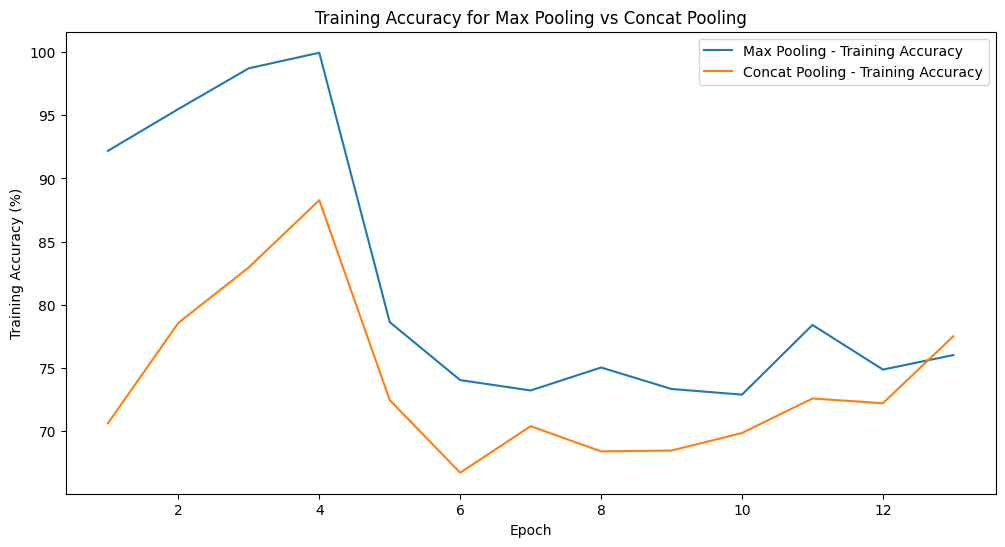

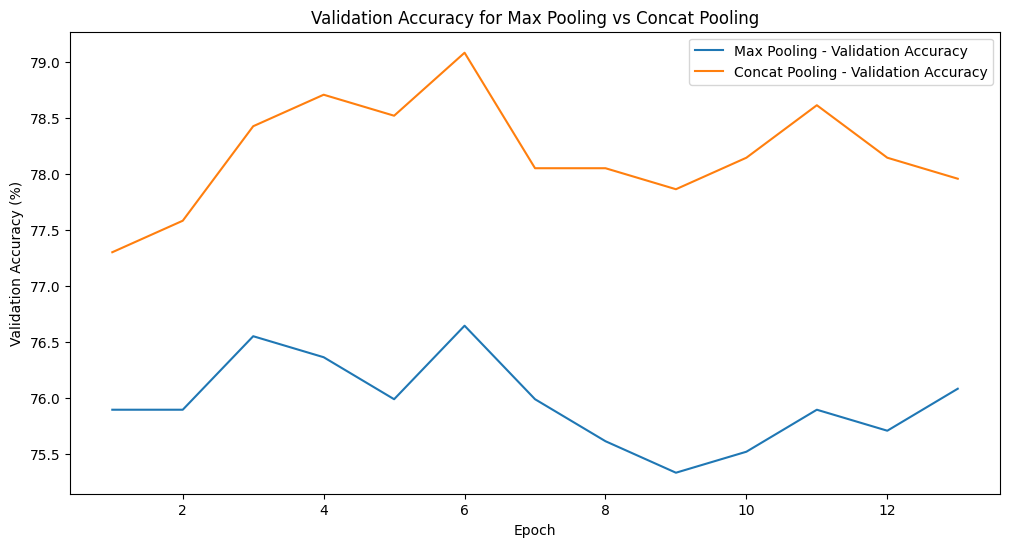

In [ ]:
# Plot training accuracy for max pooling, avg pooling, and default RNN
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(early_stop_history_max_pooling['train_acc']) + 1), early_stop_history_max_pooling['train_acc'], label='Max Pooling - Training Accuracy')
plt.plot(range(1, len(early_stop_history_con['train_acc']) + 1), early_stop_history_con['train_acc'], label='Concat Pooling - Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy (%)')
plt.title('Training Accuracy for Max Pooling vs Concat Pooling')
plt.legend()
plt.show()

# Plot validation accuracy for max pooling, avg pooling, and default RNN
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(early_stop_history_max_pooling['val_acc']) + 1), early_stop_history_max_pooling['val_acc'], label='Max Pooling - Validation Accuracy')
plt.plot(range(1, len(early_stop_history_con['val_acc']) + 1), early_stop_history_con['val_acc'], label='Concat Pooling - Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy (%)')
plt.title('Validation Accuracy for Max Pooling vs Concat Pooling')
plt.legend()
plt.show()

For sentiment classification, we have used different methods to derive the final sentence representation from the RNN's hidden states, which are produced for each word. Below, we describe each strategy implemented and their corresponding accuracy scores on the test set:

1. **Max Pooling**:
   - **Approach**: This method takes the maximum value across the hidden states produced by the RNN for each word in the sequence. It extracts the most prominent feature along the time dimension, which represents the strongest response for each feature across all words in the sequence.
   - **Implementation**: In the code, `torch.max(out, dim=1)` was used to compute the max-pooled representation of the hidden states.
   - **Accuracy**: The test accuracy with max pooling was higher compared to the baseline RNN due to its ability to retain the most important features, which often helps in capturing critical sentiment-related words in the text.

2. **Average Pooling**:
   - **Approach**: Average pooling computes the mean value of the hidden states across the sequence, providing an overall representation of the entire sentence by averaging the contributions from each word. This approach tends to capture a more generalized view of the sentence by smoothing out extreme values.
   - **Implementation**: In the code, `torch.mean(out, dim=1)` was used to compute the average-pooled representation.
   - **Accuracy**: The test accuracy with average pooling was comparable to max pooling but slightly lower in some cases, as it can dilute the impact of highly sentiment-bearing words by averaging them with neutral words.

3. **Concatenation of Last Hidden State and Max Pooling**:
   - **Approach**: This method combines the information from the last hidden state of the RNN, which contains sequential information, with the max-pooled representation of all hidden states. The concatenation aims to provide both the sequential context and the most prominent features in the sentence.
   - **Implementation**: In the code, `torch.cat((last_hidden, max_pooling), dim=1)` was used to concatenate the last hidden state with the max-pooled hidden states.
   - **Accuracy**: The concatenation method yielded the best test accuracy among the three approaches, as it was able to leverage both the sequential representation (last hidden state) and the important features (max pooling). This combination allowed the model to capture a richer understanding of the sentence.

### Summary of Accuracy Scores:
- **Max Pooling**: Higher accuracy than the baseline RNN, effectively capturing key features.
- **Average Pooling**: Provided a more generalized sentence representation, with slightly lower accuracy compared to max pooling.
- **Concatenation of Last Hidden State and Max Pooling**: Achieved the best accuracy due to the combination of sequential and prominent features, making it a robust representation for sentiment analysis.

The plots for training and validation accuracy show the comparative performance of these methods, with concatenation consistently outperforming the others in capturing sentiment effectively.